# Shipping experiment analysis 16S - species level

In [1]:
import pandas as pd
import os

import tkinter as tk

In [2]:
import qiime2 as q2

from qiime2 import (Artifact,
                    Metadata as qmd)

from qiime2.plugins import (cutadapt,
                            demux,
                            feature_table as qft,
                            taxa as q2t,)

from qiime2 import Metadata
from qiime2 import Visualization

from qiime2.plugins.feature_table.methods import (merge_seqs, merge, filter_seqs, filter_samples, filter_features) 
import qiime2.plugins.feature_classifier.actions as feature_classifier_actions
import qiime2.plugins.metadata.actions as metadata_actions
import qiime2.plugins.taxa.actions as taxa_actions
import qiime2.plugins.phylogeny.actions as phylogeny_actions
from qiime2.plugins.fragment_insertion.methods import sepp


%matplotlib inline

fatal: bad revision 'HEAD'
fatal: bad revision 'HEAD'


In [3]:
import os
import qiime2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the working directory
wd = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

# Change to the working directory
os.chdir(wd)

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data


## stacked area plot for all present species (not many, therefore include all)

In [4]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

In [4]:
#import metadata:
metadata = pd.read_csv('20250513_ITS_shipping_general_metadata_all_samples_with_alpha_diversity_16S_ITS.csv', sep=',', index_col=4)
metadata

,Unnamed: 0,Chao1 kmers ITS,Chao1 OTUs ITS,Chao1 ASVs ITS,Chao1 kmers,Chao1 OTUs,Chao1 ASVs,identifier,row,column,...,Observed features kmers ITS,Shannon ASVs ITS,Evenness ASVs ITS,Simpson ASVs ITS,Shannon OTUs ITS,Evenness OTUs ITS,Simpson OTUs ITS,Shannon kmers ITS,Evenness kmers ITS,Simpson kmers ITS
16S_id,,,,,,,,,,,,,,,,,,,,,
366294_209-LP4-16S-0709,366292_209-LP4-ITS-0709,747.0,2.00,4.000000,678.0,5.0,4.0,W00.00.00,E,5,...,747.0,1.023700,0.511850,0.387775,0.301049,0.301049,0.101261,8.420116,0.882153,0.996797
366294_121-LP4-16S-0621,366292_121-LP4-ITS-0621,1052.0,4.00,6.000000,244.0,1.0,1.0,W30.02.28,E,6,...,1052.0,0.973628,0.376651,0.377949,0.220637,0.110319,0.056100,8.340575,0.830824,0.996682
366294_212-LP4-16S-0712,366292_212-LP4-ITS-0712,1253.0,7.50,7.000000,718.0,5.0,6.0,W30.03.21,H,5,...,1253.0,0.813642,0.289825,0.337533,0.091995,0.032769,0.017630,8.253068,0.801956,0.996594
366294_225-LP4-16S-0725,366292_225-LP4-ITS-0725,1212.0,5.00,7.000000,708.0,6.0,5.0,W17.02.14,E,7,...,1212.0,0.800344,0.285088,0.338125,0.051600,0.022223,0.009683,8.229968,0.803459,0.996578
366294_201-LP4-16S-0701,366292_201-LP4-ITS-0701,1204.0,5.00,8.000000,708.0,5.0,5.0,W04.02.04,E,4,...,1204.0,1.144517,0.381506,0.390090,0.329954,0.142104,0.083077,8.529651,0.833493,0.996862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_181-LP4-16S-0681,366292_181-LP4-ITS-0681,3357.0,23.50,26.428571,708.0,5.0,5.0,W30.03.03,A,2,...,3357.0,1.155855,0.248900,0.388582,0.459375,0.103012,0.101151,8.474403,0.723507,0.996769
366294_251-LP4-16S-0751,366292_251-LP4-ITS-0751,3265.0,16.25,34.000000,708.0,5.0,8.0,W04.03.01,G,10,...,3265.0,1.052332,0.226607,0.377837,0.284167,0.071042,0.057944,8.393120,0.719028,0.996696
366294_260-LP4-16S-0760,366292_260-LP4-ITS-0760,3137.0,23.50,32.000000,708.0,5.0,5.0,W30.02.01,H,11,...,3137.0,1.222896,0.263336,0.410682,0.527800,0.116678,0.117316,8.511062,0.732754,0.996812


In [5]:
#import OTU feature table (also )
#OTU table 20250513_relative_features_OTU_species_names.csv:
otu_table = pd.read_csv('16S/OTUs/alpha_rarefaction/core-metrics-results-380/20250513_relative_features_OTU_species_names.csv', sep=',', index_col=0)
otu_table



,Acetobacter cerevisiae,Lactobacillus sanfranciscensis,Pediococcus parvulus,Lactobacillus rossiae,Lactobacillus brevis
366294_118-LP4-16S-0618,0.028947,0.836842,0.010526,0.097368,0.026316
366294_124-LP4-16S-0624,0.436842,0.423684,0.000000,0.094737,0.044737
366294_128-LP4-16S-0628,0.645503,0.116402,0.026455,0.100529,0.111111
366294_130-LP4-16S-0630,0.347368,0.513158,0.013158,0.076316,0.050000
366294_132-LP4-16S-0632,0.021053,0.789474,0.013158,0.147368,0.028947
...,...,...,...,...,...
366294_263-LP4-16S-0763,0.023684,0.613158,0.002632,0.315789,0.044737
366294_264-LP4-16S-0764,0.010526,0.892105,0.005263,0.081579,0.010526
366294_265-LP4-16S-0765,0.021164,0.539683,0.044974,0.328042,0.066138
366294_266-LP4-16S-0766,0.013158,0.452632,0.065789,0.386842,0.081579


In [6]:
otu_table.columns.to_list()

['Acetobacter cerevisiae',
 'Lactobacillus sanfranciscensis',
 'Pediococcus parvulus',
 'Lactobacillus rossiae',
 'Lactobacillus brevis']

-> some samples missing, but it's ok..

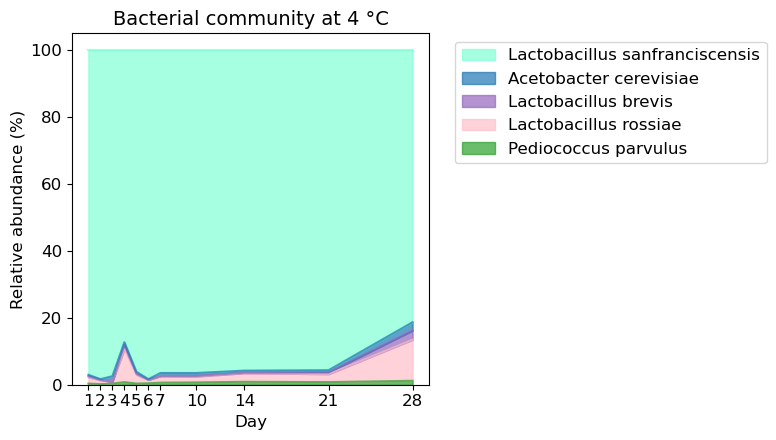

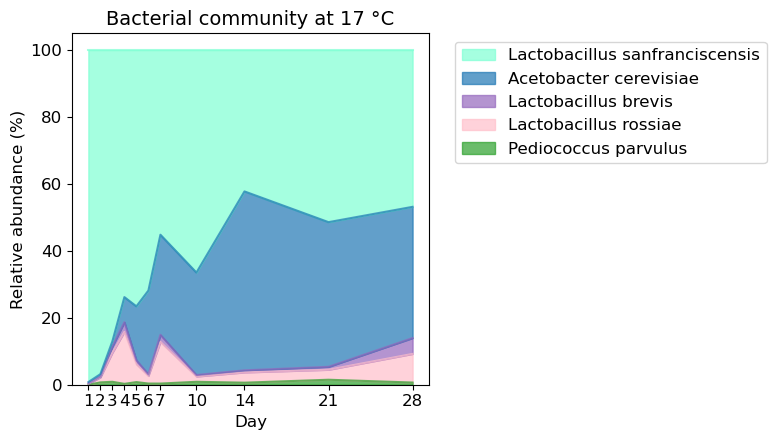

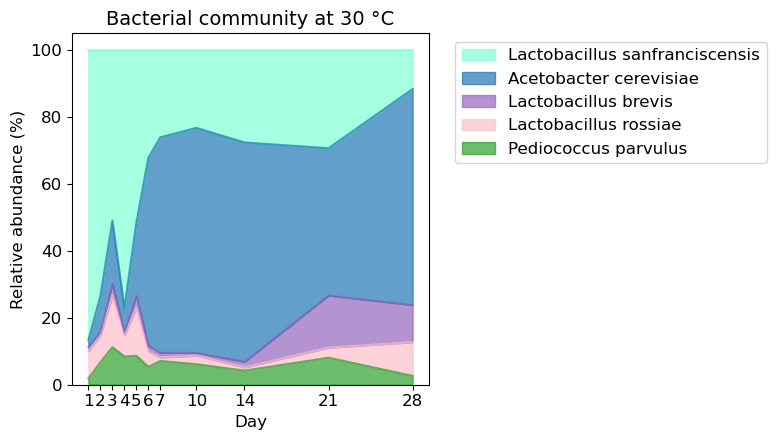

In [231]:
import pandas as pd
import matplotlib.pyplot as plt

custom_order = [
    'Pediococcus parvulus',
 'Lactobacillus rossiae',
 'Lactobacillus brevis',
 'Acetobacter cerevisiae',
 'Lactobacillus sanfranciscensis'
 ]

# # Define custom colors for species
# custom_colors = {
#     's__Lactobacillus_brevis': '#1f77b4',
#     's__Lactobacillus_sanfranciscensis_TMW_1.1304': '#7fffd4',
#     's__Lactobacillus_rossiae': '#2ca02c',
#     's__Acetobacter_pasteurianus': '#ffc0cb',
#     's__uncultured_bacterium': '#9467bd',
#     's__uncultured_organism': '#8c564b',
#     's__Pantoea_agglomerans': '#e377c2',
#     's__Bacillus_halotolerans': '#7f7f7f',
#     's__Paenibacillus_hordei': '#bcbd22',
#     's__Faecalibacterium_prausnitzii': '#17becf',
#     'Other': '#c7c7c7'  # Default color for "Other"
# }

# Define custom colors for species
custom_colors = {
    'Acetobacter cerevisiae': '#1f77b4',
    'Lactobacillus sanfranciscensis': '#7fffd4',
    'Pediococcus parvulus': '#2ca02c',
    'Lactobacillus rossiae': '#ffc0cb',
    'Lactobacillus brevis': '#9467bd',
   } 

# Define a renaming dictionary for species
# renaming_dict = {
#     's__Lactobacillus_brevis': 'Lactobacillus brevis',
#     's__Lactobacillus_sanfranciscensis_TMW_1.1304': 'Lactobacillus sanfranciscensis',
#     's__Lactobacillus_rossiae': 'Lactobacillus rossiae',
#     's__Acetobacter_pasteurianus': 'Acetobacter pasteurianus',
#     's__uncultured_bacterium': 'Pediococcus (uncultured)',
#     's__uncultured_organism': 'Prevotellaceae (uncultured)',
#     's__Pantoea_agglomerans': 'Pantoea agglomerans',
#     's__Bacillus_halotolerans': 'Bacillus halotolerans',
#     's__Paenibacillus_hordei': 'Paenibacillus hordei',
#     's__Faecalibacterium_prausnitzii': 'Faecalibacterium prausnitzii',
#     'Other': 'Other'
# }
# Define a renaming dictionary for species
renaming_dict = {
    'Acetobacter cerevisiae': 'Acetobacter cerevisiae',
    'Lactobacillus sanfranciscensis': 'Lactobacillus sanfranciscensis',
    'Pediococcus parvulus': 'Pediococcus parvulus',
    'Lactobacillus rossiae': 'Lactobacillus rossiae',
    'Lactobacillus brevis': 'Lactobacillus brevis',
    #'Other': 'Other'
}

# --- Step 1: Merge OTU table with metadata to bring in Day and Temperature ---
otu_with_metadata = otu_table.copy()
otu_with_metadata['day'] = metadata['day']
otu_with_metadata['temperature'] = metadata['temperature']

# --- Step 2: Filter for relevant time points ---
time_points = [1, 2, 3, 4, 5, 6, 7, 10,14, 21, 28]
otu_with_metadata = otu_with_metadata[otu_with_metadata['day'].isin(time_points)]

# --- Step 3: Function to generate and plot relative abundance ---
def plot_relative_abundance_area(df, temp, custom_order=None, custom_colors=None, renaming_dict=None):
    # Filter data for the selected temperature
    df_temp = df[df['temperature'] == temp]

    # Group by Day and compute mean abundance per species
    grouped = df_temp.groupby('day').mean()
    grouped = grouped.drop(columns=['temperature'], errors='ignore')  # Drop non-species columns

    # Normalize to relative abundance
    relative_abundance = grouped.div(grouped.sum(axis=1), axis=0) * 100

    # Identify top 10 species over all days for the current temperature
    mean_abundance = relative_abundance.mean()
    top_species = mean_abundance.nlargest(10).index.tolist()

    # Apply custom order if provided
    if custom_order:
        custom_order = [s for s in custom_order if s in relative_abundance.columns]
    else:
        custom_order = top_species

    # Ensure all columns are accounted for
    species_columns = [col for col in relative_abundance.columns if col in custom_order]
    other_species = [col for col in relative_abundance.columns if col not in custom_order]
    
    # Collapse "Other"
    #relative_abundance['Other'] = relative_abundance[other_species].sum(axis=1)
    #relative_abundance = relative_abundance[custom_order + ['Other']]
    relative_abundance = relative_abundance[custom_order]

    # Rename species if needed
    if renaming_dict:
        relative_abundance.columns = [renaming_dict.get(col, col) for col in relative_abundance.columns]

    # Define colors
    if custom_colors:
        colors = [custom_colors.get(col, '#c7c7c7') for col in relative_abundance.columns]
    else:
        colors = [f'#{hash(col) & 0xFFFFFF:06x}' for col in relative_abundance.columns]

    # Plot
    ax = relative_abundance.plot(
        kind='area', stacked=True, color=colors,
        figsize=(8, 4.5), alpha=0.7
    )
    ax.set_title(f"Bacterial community at {temp} °C", fontsize=14)
    ax.set_xlabel("Day", fontsize=12)
    ax.set_ylabel("Relative abundance (%)", fontsize=12)
    ax.set_xticks(time_points)
    ax.tick_params(axis='x',labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xticklabels(time_points)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), title="", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fontsize=12)

    plt.tight_layout()
    #save pdf
    plt.savefig(f'Figures/20250513_relative_abundance_area_{temp}C_16S.pdf', bbox_inches='tight')
    plt.show()

# --- Step 4: Loop through each temperature and plot ---
for temp in sorted(otu_with_metadata['temperature'].dropna().unique()):
    plot_relative_abundance_area(
        otu_with_metadata, temp,
        custom_order=custom_order,
        custom_colors=custom_colors,
        renaming_dict=renaming_dict
    )


### differential abundance

In [26]:
# convert this csv: 16S/OTUs/alpha_rarefaction/core-metrics-results-380/20250513_relative_features_OTU_species_names.csv 
#to biom table format:
from biom import Table
from biom.util import biom_open  # Required for HDF5 writing
import pandas as pd

# Load the CSV file (samples as rows, species as columns)
csv_path = '16S/OTUs/alpha_rarefaction/core-metrics-results-380/20250513_relative_features_OTU_species_names.csv'
otu_df = pd.read_csv(csv_path, sep=',', index_col=0)

# Transpose to have species as rows, samples as columns (as required by BIOM)
otu_df_T = otu_df.T

# Create the BIOM table
biom_table = Table(otu_df_T.values, 
                   observation_ids=otu_df_T.index.tolist(), 
                   sample_ids=otu_df_T.columns.tolist())

# Save as HDF5 BIOM using the correct context
output_path = '16S/OTUs/alpha_rarefaction/core-metrics-results-380/otu_table_relative_abundance.biom'
with biom_open(output_path, 'w') as f:
    biom_table.to_hdf5(f, generated_by="CSV to BIOM converter (relative abundances)")

            


In [27]:
!qiime tools import \
  --input-path 16S/OTUs/alpha_rarefaction/core-metrics-results-380/otu_table_relative_abundance.biom \
  --type 'FeatureTable[RelativeFrequency]' \
  --input-format BIOMV210Format \
  --output-path 16S/OTUs/alpha_rarefaction/core-metrics-results-380/otu_table_relative_abundance.qza


fatal: bad revision 'HEAD'
fatal: bad revision 'HEAD'
Imported 16S/OTUs/alpha_rarefaction/core-metrics-results-380/otu_table_relative_abundance.biom as BIOMV210Format to 16S/OTUs/alpha_rarefaction/core-metrics-results-380/otu_table_relative_abundance.qza


run songbird in qiime -> doesn't work in this distribution..

In [28]:
!qiime songbird multinomial \
  --i-table 16S/OTUs/alpha_rarefaction/core-metrics-results-380/otu_table_relative_abundance.qza \
  --m-metadata-file 16S_metadata_for_qiime.tsv \
  --p-formula "temperature + day + temperature:day" \
  --p-epochs 5000 \
  --p-differential-prior 0.5 \
  --p-summary-interval 1 \
  --output-dir songbird_output


Error: QIIME 2 has no plugin/command named 'songbird'.


### switch to R, run ancombc-2, return here for visuals

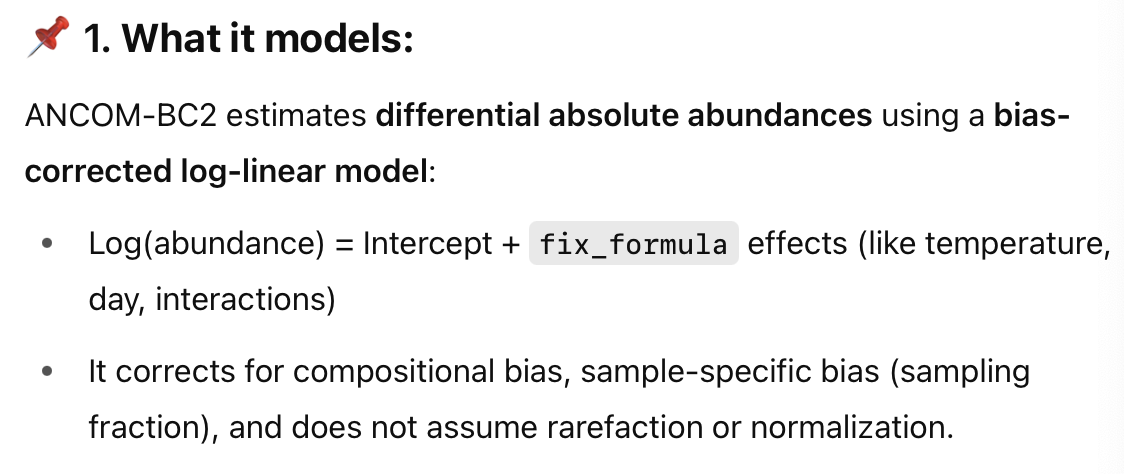

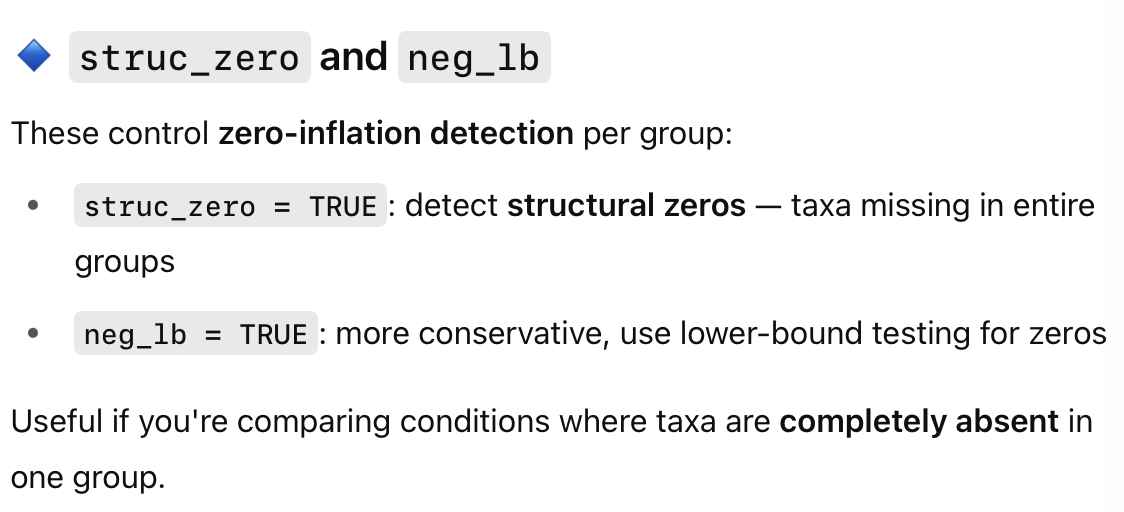

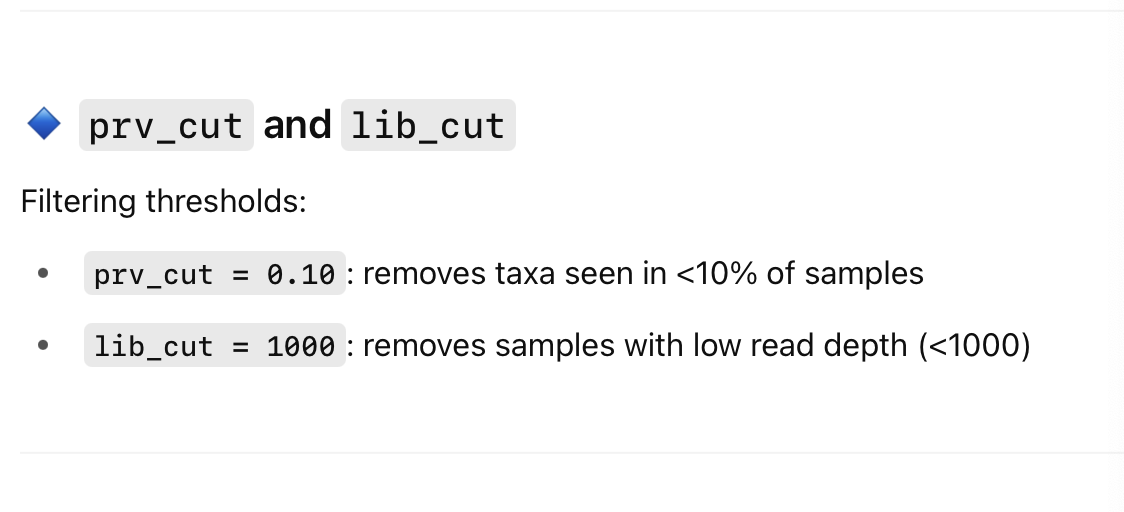

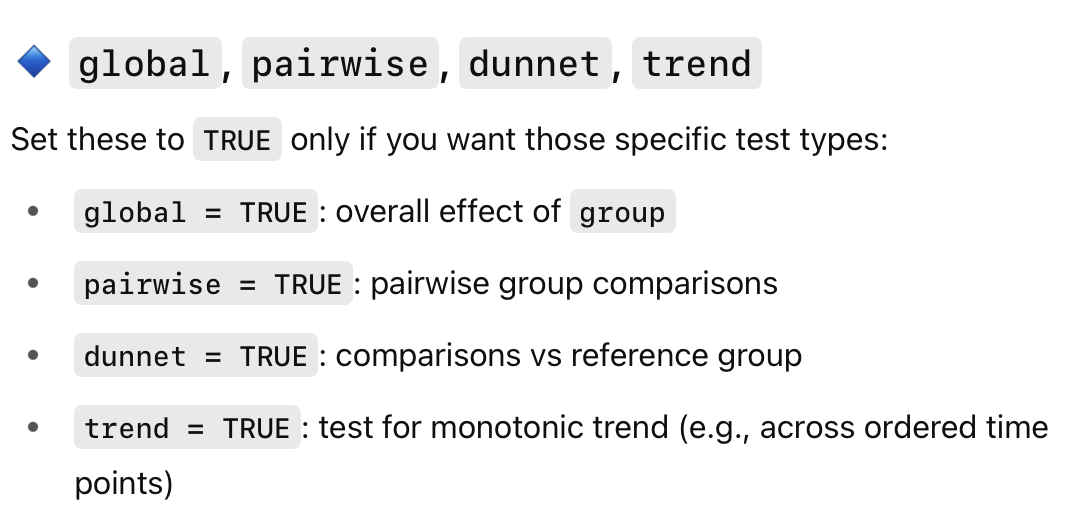

ancombc-2 output:
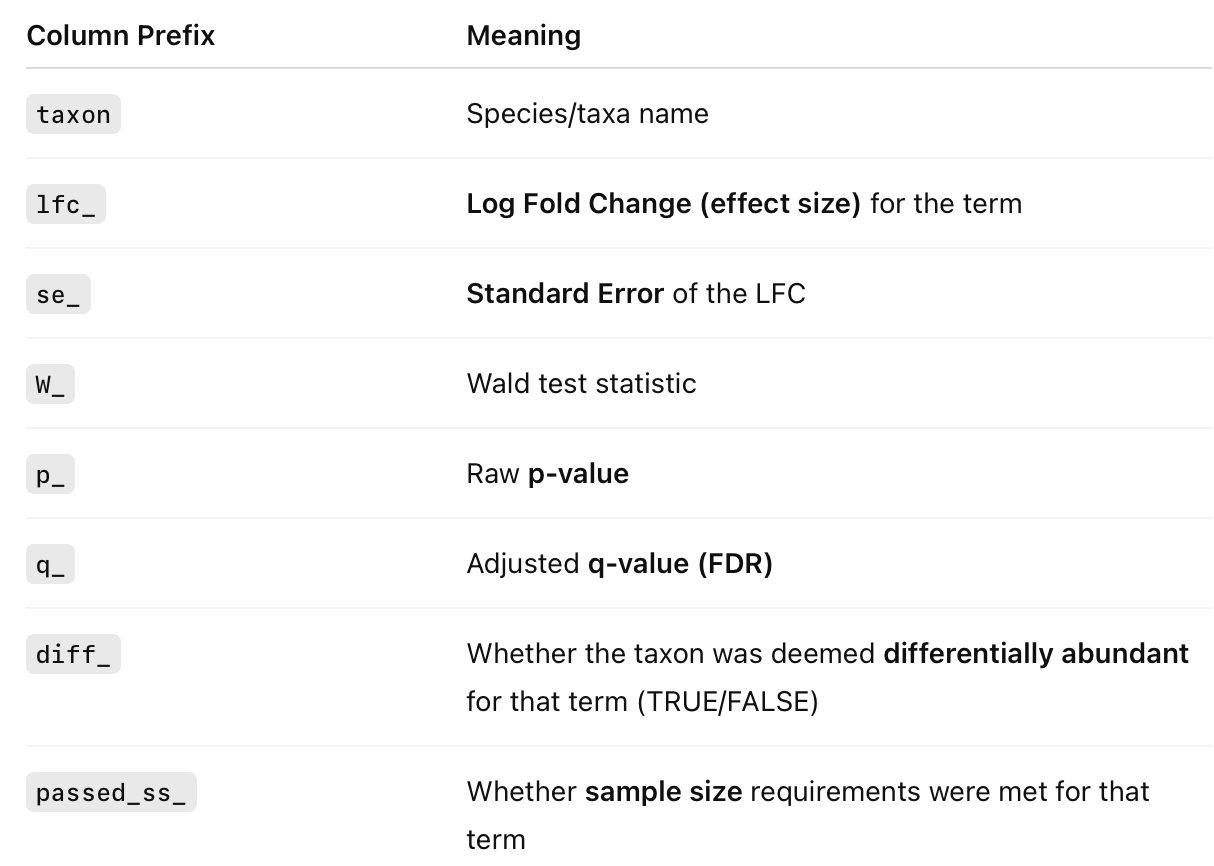


### group = temperature outputs:

with group = 'day' it fails... 

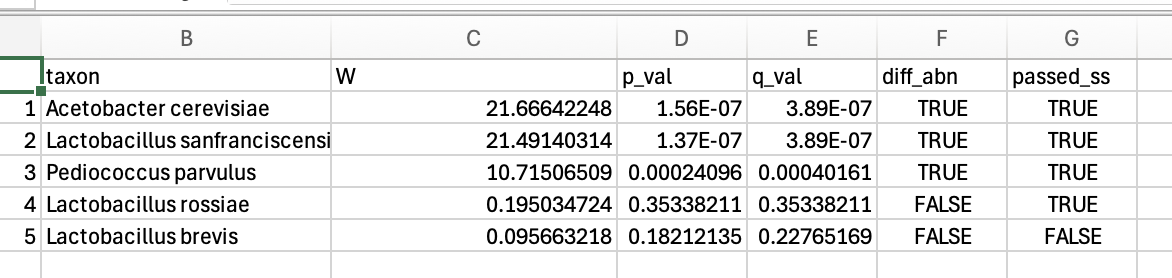

In [7]:
#import ancombc2_results.csv:
ancombc2_results = pd.read_csv('Stats/ancombc2_main_results_temp_group_16S.csv', sep=',', index_col=0)
ancombc2_results
ancom_pairwise_results = pd.read_csv('Stats/ancombc2_pairwise_results_temp_group_16S.csv', sep=',', index_col=0)
ancom_pairwise_results
ancom_global_results = pd.read_csv('Stats/ancombc2_global_results_temp_group_16S.csv', sep=',', index_col=0)
ancom_global_results

,taxon,W,p_val,q_val,diff_abn,passed_ss
1,Acetobacter cerevisiae,21.666422,1.555063e-07,3.887657e-07,True,True
2,Lactobacillus sanfranciscensis,21.491403,1.369901e-07,3.887657e-07,True,True
3,Pediococcus parvulus,10.715065,2.409630e-04,4.016050e-04,True,True
4,Lactobacillus rossiae,0.195035,3.533821e-01,3.533821e-01,False,True
5,Lactobacillus brevis,0.095663,1.821214e-01,2.276517e-01,False,False


In [8]:
ancombc2_results

,taxon,lfc_(Intercept),lfc_day2,lfc_day3,lfc_day4,lfc_day5,lfc_day6,lfc_day7,lfc_day14,lfc_day21,...,passed_ss_day3,passed_ss_day4,passed_ss_day5,passed_ss_day6,passed_ss_day7,passed_ss_day14,passed_ss_day21,passed_ss_day28,passed_ss_temperature17,passed_ss_temperature30
1,Acetobacter cerevisiae,-1.605196,0.121253,0.344472,0.225631,0.992475,2.066731,1.619648,2.458053,1.870074,...,True,True,False,False,False,False,False,True,True,True
2,Lactobacillus sanfranciscensis,2.588816,-0.232718,-0.788718,-0.957723,-0.894447,-0.977162,-1.048219,-0.968534,-1.298778,...,False,False,False,False,False,False,False,False,False,True
3,Pediococcus parvulus,-0.063159,0.882129,0.767833,0.469671,0.562878,0.492367,0.407968,0.837985,0.929144,...,False,True,False,True,False,False,False,True,True,True
4,Lactobacillus rossiae,0.949780,-0.135151,0.068556,0.668703,0.045990,-0.512968,-0.204352,-0.201784,-0.487757,...,True,True,True,True,True,True,True,True,True,True
5,Lactobacillus brevis,0.622505,-0.435970,0.403579,0.000082,-0.029838,-0.457387,0.110620,-0.188521,0.380168,...,True,False,True,True,True,True,False,False,False,False


In [9]:
df = ancombc2_results.copy()

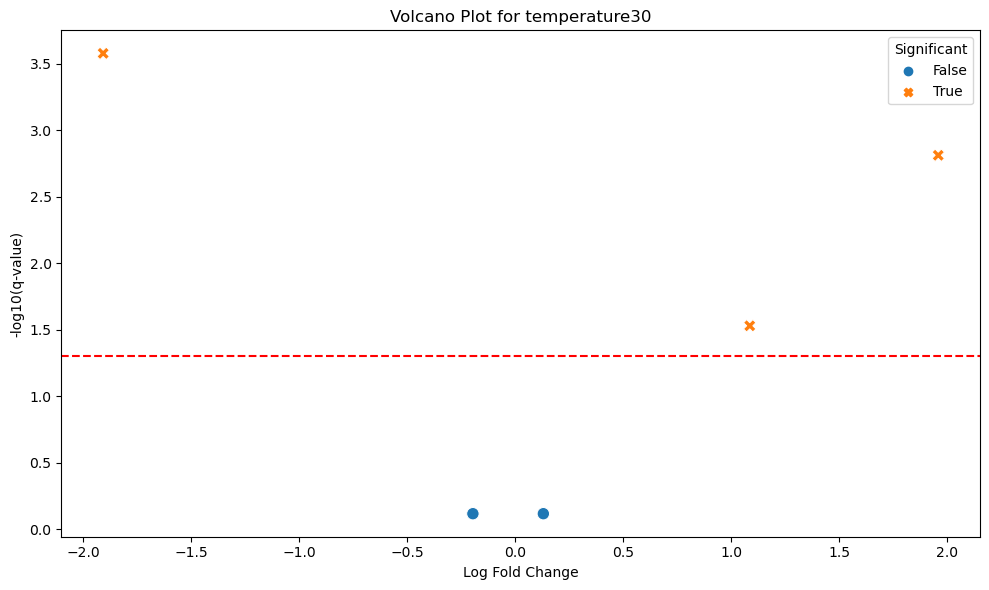

In [235]:
import numpy as np
# Choose term to plot
term = "temperature30"

# Extract log fold change and q-values
volcano_df = df[["taxon", f"lfc_{term}", f"q_{term}"]].dropna()
volcano_df.columns = ["taxon", "logFC", "qval"]
volcano_df["-log10(q)"] = -np.log10(volcano_df["qval"])
volcano_df["significant"] = volcano_df["qval"] < 0.05

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=volcano_df, x="logFC", y="-log10(q)", hue="significant", style="significant", s=80)
plt.axhline(-np.log10(0.05), linestyle="--", color="red")
plt.title(f"Volcano Plot for {term}")
plt.xlabel("Log Fold Change")
plt.ylabel("-log10(q-value)")
plt.legend(title="Significant")
plt.tight_layout()
plt.show()


In [10]:
#make 'taxon' the index in df:
df.set_index('taxon', inplace=True)
df

,lfc_(Intercept),lfc_day2,lfc_day3,lfc_day4,lfc_day5,lfc_day6,lfc_day7,lfc_day14,lfc_day21,lfc_day28,...,passed_ss_day3,passed_ss_day4,passed_ss_day5,passed_ss_day6,passed_ss_day7,passed_ss_day14,passed_ss_day21,passed_ss_day28,passed_ss_temperature17,passed_ss_temperature30
taxon,,,,,,,,,,,,,,,,,,,,,
Acetobacter cerevisiae,-1.605196,0.121253,0.344472,0.225631,0.992475,2.066731,1.619648,2.458053,1.870074,1.254560,...,True,True,False,False,False,False,False,True,True,True
Lactobacillus sanfranciscensis,2.588816,-0.232718,-0.788718,-0.957723,-0.894447,-0.977162,-1.048219,-0.968534,-1.298778,-2.928138,...,False,False,False,False,False,False,False,False,False,True
Pediococcus parvulus,-0.063159,0.882129,0.767833,0.469671,0.562878,0.492367,0.407968,0.837985,0.929144,-0.955363,...,False,True,False,True,False,False,False,True,True,True
Lactobacillus rossiae,0.949780,-0.135151,0.068556,0.668703,0.045990,-0.512968,-0.204352,-0.201784,-0.487757,-0.241236,...,True,True,True,True,True,True,True,True,True,True
Lactobacillus brevis,0.622505,-0.435970,0.403579,0.000082,-0.029838,-0.457387,0.110620,-0.188521,0.380168,0.302044,...,True,False,True,True,True,True,False,False,False,False


In [11]:
plot_df

NameError: name 'plot_df' is not defined

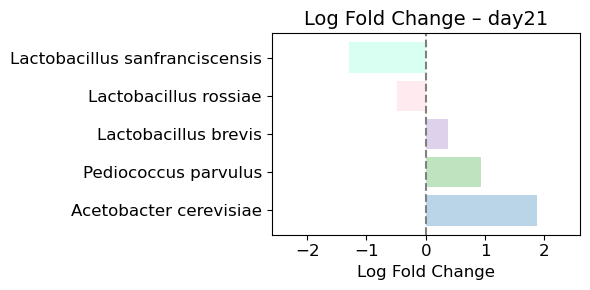

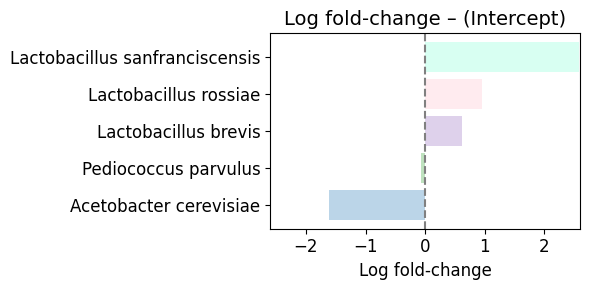

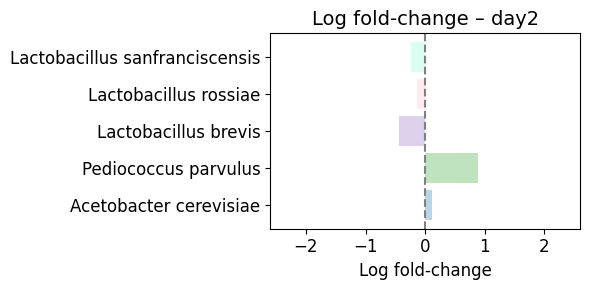

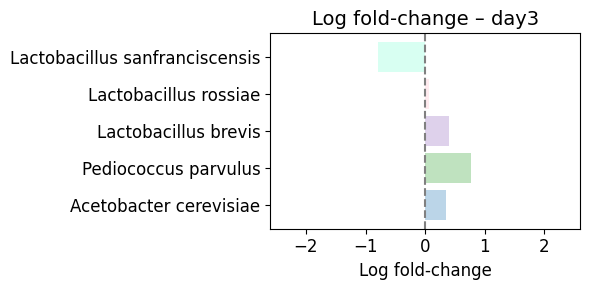

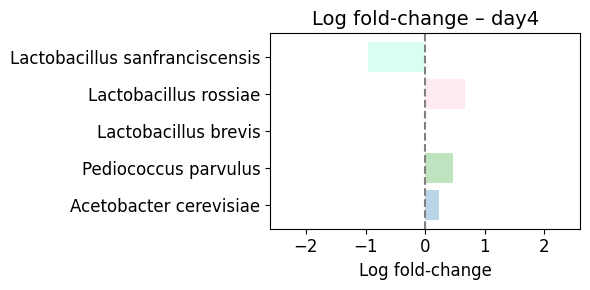

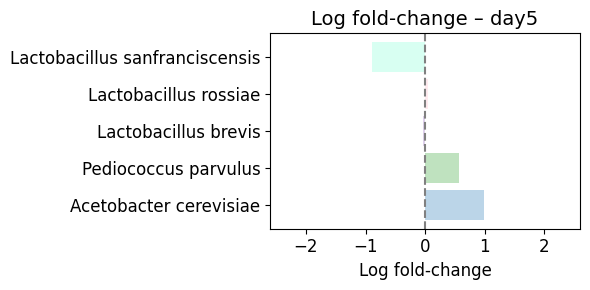

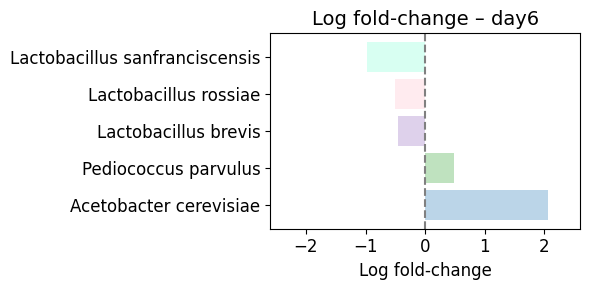

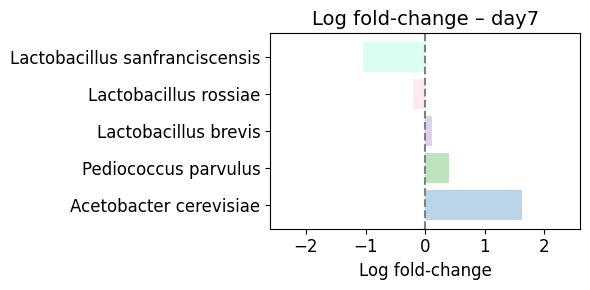

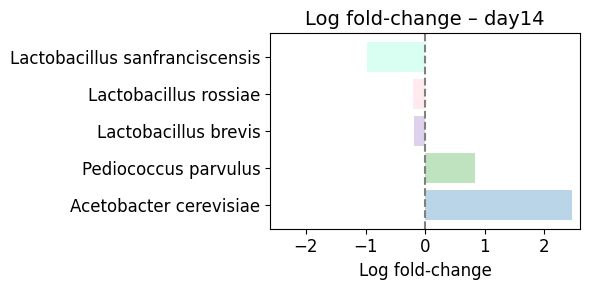

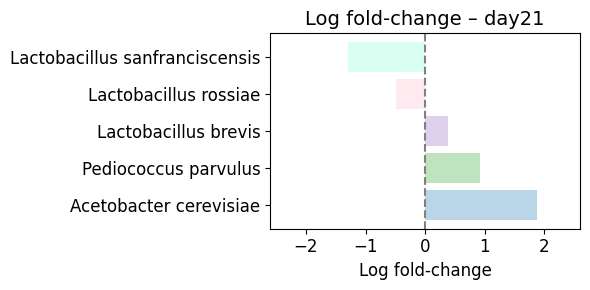

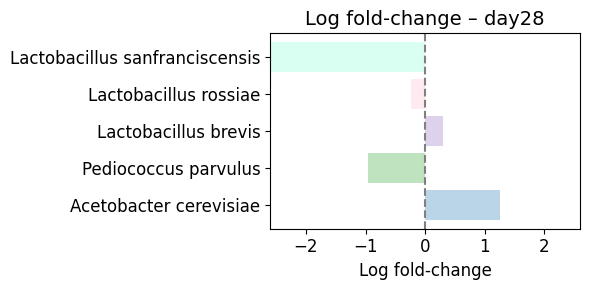

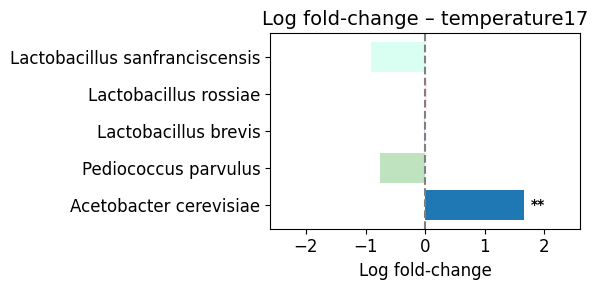

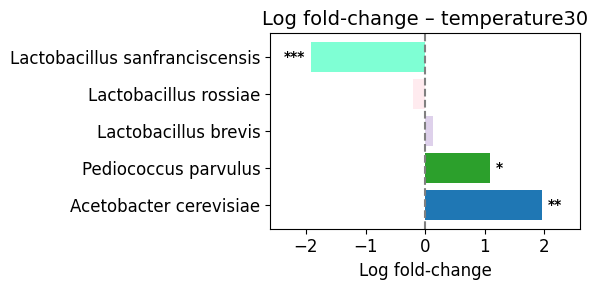

In [12]:

import pandas as pd
import matplotlib.pyplot as plt



# Define custom colors for selected taxa
custom_colors = {
    
    'Lactobacillus sanfranciscensis': '#7fffd4',
    
    'Lactobacillus rossiae': '#ffc0cb',
    'Lactobacillus brevis': '#9467bd',
    'Pediococcus parvulus': '#2ca02c',
    'Acetobacter cerevisiae': '#1f77b4'
}
custom_order = [
    'Lactobacillus sanfranciscensis',
    
    'Lactobacillus rossiae',
    'Lactobacillus brevis',
    'Pediococcus parvulus',
    'Acetobacter cerevisiae'
 ]

# Identify all conditions (e.g., lfc_temperature30, lfc_day14, etc.)
lfc_cols = [col for col in df.columns if col.startswith("lfc_")]
qval_cols = [col for col in df.columns if col.startswith("q_")]
conditions = [col.replace("lfc_", "") for col in lfc_cols]

# Loop through all conditions and plot
for cond in conditions:
    lfc_col = f"lfc_{cond}"
    q_col = f"q_{cond}"

    if lfc_col not in df.columns or q_col not in df.columns:
        continue  # skip if column missing

    plot_df = df[[lfc_col, q_col]].copy()
    plot_df.columns = ["logFC", "qval"]
    plot_df["taxon"] = plot_df.index

    # Define significance and styling
    plot_df["significant"] = plot_df["qval"] < 0.05
    plot_df["alpha"] = plot_df["significant"].apply(lambda x: 1.0 if x else 0.3)
    plot_df["color"] = plot_df["taxon"].map(custom_colors).fillna("#cccccc")

    plot_df.index = pd.Categorical(plot_df.index, categories=custom_order, ordered=True)
    plot_df = plot_df.sort_index()



    # --- Plot ---
    plt.figure(figsize=(6, 3))
    for _, row in plot_df.iterrows():
        plt.barh(
            y=row["taxon"],
            width=row["logFC"],
            color=row["color"],
            alpha=row["alpha"]
        )

        # Add significance stars
    for _, row in plot_df.iterrows():
        star = (
            "***" if row["qval"] < 0.001 else
            "**" if row["qval"] < 0.01 else
            "*" if row["qval"] < 0.05 else
            ""
        )
        if star:
            xpos = row["logFC"] + (0.1 if row["logFC"] >= 0 else -0.1)
            plt.text(
                xpos, row["taxon"], star,
                va='center', ha='left' if row["logFC"] >= 0 else 'right',
                fontsize=10, fontweight='bold'
            )
    

    plt.axvline(0, linestyle="--", color="gray")
    plt.title(f"Log fold-change – {cond}", fontsize=14)
    plt.xlabel("Log fold-change", fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlim(-2.6, 2.6)
    plt.yticks(fontsize=12)
    plt.ylabel("")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    # Save the plot
    #plt.savefig(f'Figures/20250513_ancombc2_logFC_{cond}_16S.pdf', bbox_inches='tight')
    plt.show()



In [150]:
df

,lfc_(Intercept),lfc_day2,lfc_day3,lfc_day4,lfc_day5,lfc_day6,lfc_day7,lfc_day14,lfc_day21,lfc_day28,...,passed_ss_day3,passed_ss_day4,passed_ss_day5,passed_ss_day6,passed_ss_day7,passed_ss_day14,passed_ss_day21,passed_ss_day28,passed_ss_temperature17,passed_ss_temperature30
taxon,,,,,,,,,,,,,,,,,,,,,
Acetobacter cerevisiae,-1.605196,0.121253,0.344472,0.225631,0.992475,2.066731,1.619648,2.458053,1.870074,1.254560,...,True,True,False,False,False,False,False,True,True,True
Lactobacillus sanfranciscensis,2.588816,-0.232718,-0.788718,-0.957723,-0.894447,-0.977162,-1.048219,-0.968534,-1.298778,-2.928138,...,False,False,False,False,False,False,False,False,False,True
Pediococcus parvulus,-0.063159,0.882129,0.767833,0.469671,0.562878,0.492367,0.407968,0.837985,0.929144,-0.955363,...,False,True,False,True,False,False,False,True,True,True
Lactobacillus rossiae,0.949780,-0.135151,0.068556,0.668703,0.045990,-0.512968,-0.204352,-0.201784,-0.487757,-0.241236,...,True,True,True,True,True,True,True,True,True,True
Lactobacillus brevis,0.622505,-0.435970,0.403579,0.000082,-0.029838,-0.457387,0.110620,-0.188521,0.380168,0.302044,...,True,False,True,True,True,True,False,False,False,False


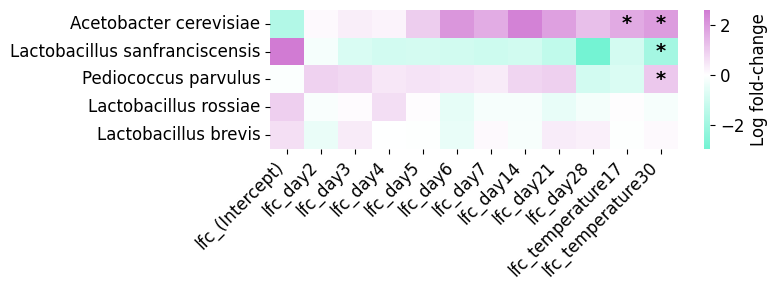

In [13]:

from matplotlib.colors import LinearSegmentedColormap
# Select all logFC columns
lfc_cols = [col for col in df.columns if col.startswith("lfc_")]
lfc_df = df[lfc_cols]

# Optional: filter to taxa with at least one significant q-value
# q_cols = [col for col in df.columns if col.startswith("q_")]
# significant_taxa = df[df[q_cols].lt(0.05).any(axis=1)].index.tolist()
#lfc_df_filtered = lfc_df.loc[lfc_df.index.isin(significant_taxa)]
lfc_df_filtered = lfc_df.copy()
# Get matching q-value columns
qval_cols = [col.replace("lfc_", "q_") for col in lfc_cols]
qval_df = df[qval_cols].copy()
qval_df.columns = lfc_df.columns  # rename to match lfc_df for easy alignment


# Plot
#make the own color map with those two colors: "#345084FF", "#CB6BCEFF":
custom_cmap = LinearSegmentedColormap.from_list(
    name='custom_cmap',
    colors=["#74F3D3FF", "#FFFFFF", "#CB6BCEFF"],
    N=256
)

# Plot
plt.figure(figsize=(8, 3))
ax = sns.heatmap(
    lfc_df_filtered,
    cmap=custom_cmap,
    center=0,
    cbar_kws={"label": "Log fold-change"}
)

# Adjust tick fonts
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation =0,fontsize=12)

# Adjust colorbar font
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)               # Colorbar tick labels
cbar.ax.set_ylabel("Log fold-change", fontsize=12)  # Colorbar label

plt.xlabel("")
plt.ylabel("")
plt.title("")
# Add stars for significant (q < 0.05) entries
for y, row_label in enumerate(lfc_df_filtered.index):
    for x, col_label in enumerate(lfc_df_filtered.columns):
        qval = qval_df.loc[row_label, col_label]
        if qval < 0.05:
            ax.text(
                x + 0.5, y + 0.5, '*',
                ha='center', va='center',
                color='black', fontsize=14, fontweight='bold'
            )

plt.tight_layout()
# Save the plot
#plt.savefig(f'Figures/20250516_ancombc2_heatmap_16S.pdf', bbox_inches='tight')
plt.show()



/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_78047/2986206071.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


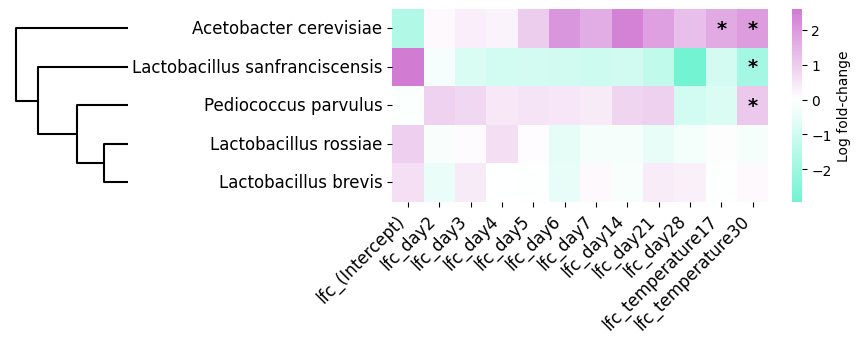

In [15]:

from matplotlib.colors import LinearSegmentedColormap
# Select all logFC columns
lfc_cols = [col for col in df.columns if col.startswith("lfc_")]
lfc_df = df[lfc_cols]

# Optional: filter to taxa with at least one significant q-value
# q_cols = [col for col in df.columns if col.startswith("q_")]
# significant_taxa = df[df[q_cols].lt(0.05).any(axis=1)].index.tolist()
#lfc_df_filtered = lfc_df.loc[lfc_df.index.isin(significant_taxa)]
lfc_df_filtered = lfc_df.copy()
# Get matching q-value columns
qval_cols = [col.replace("lfc_", "q_") for col in lfc_cols]
qval_df = df[qval_cols].copy()
qval_df.columns = lfc_df.columns  # rename to match lfc_df for easy alignment


# Plot
#make the own color map with those two colors: "#345084FF", "#CB6BCEFF":
custom_cmap = LinearSegmentedColormap.from_list(
    name='custom_cmap',
    colors=["#74F3D3FF", "#FFFFFF", "#CB6BCEFF"],
    N=256
)

# Plot
from scipy.cluster.hierarchy import linkage, leaves_list

# Cluster taxa (rows)
row_linkage = linkage(lfc_df_filtered, method='average', metric='euclidean')
row_order = leaves_list(row_linkage)

# Cluster conditions (columns)
#col_linkage = linkage(lfc_df_filtered.T, method='average', metric='euclidean')
#col_order = leaves_list(col_linkage)

# Reorder the matrix
lfc_clustered = lfc_df_filtered.iloc[row_order, :]
qval_clustered = qval_df.loc[lfc_clustered.index, lfc_clustered.columns]

from scipy.cluster.hierarchy import dendrogram
import matplotlib.gridspec as gridspec

# Create figure with subplots: dendrogram + heatmap
fig = plt.figure(figsize=(11, 2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4], wspace=0.9)

# Plot dendrogram
ax_dendro = plt.subplot(gs[0])
dendro = dendrogram(row_linkage, orientation='left', no_labels=True, ax=ax_dendro, color_threshold=0,
                    link_color_func=lambda k: 'black')
ax_dendro.invert_yaxis()
ax_dendro.axis('off')



# Reorder heatmap data based on dendrogram leaves
lfc_clustered = lfc_df_filtered.iloc[row_order, :]
qval_clustered = qval_df.loc[lfc_clustered.index, lfc_clustered.columns]

# Plot heatmap
ax_heatmap = plt.subplot(gs[1])
sns.heatmap(
    lfc_clustered,

    cmap=custom_cmap,
    center=0,
    ax=ax_heatmap,
    cbar_kws={"label": "Log fold-change"}
)

for y, row_label in enumerate(lfc_clustered.index):
    for x, col_label in enumerate(lfc_clustered.columns):
        qval = qval_clustered.loc[row_label, col_label]
        if qval < 0.05:
            ax_heatmap.text(x + 0.5, y + 0.5, '*',
                            ha='center', va='center',
                            color='black', fontsize=14, fontweight='bold')


# Styling
ax_heatmap.set_xticklabels(ax_heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax_heatmap.set_yticklabels(ax_heatmap.get_yticklabels(), rotation=0, fontsize=12)
ax_heatmap.set_xlabel("")
ax_heatmap.set_ylabel("")

plt.tight_layout()


# Save the plot
#plt.savefig(f'Figures/20250516_ancombc2_heatmap_16S_with_cluster.pdf', bbox_inches='tight')
plt.show()

In [16]:
#make a column out of 'taxon' which is currently the index:
df.reset_index(inplace=True)
df

,taxon,lfc_(Intercept),lfc_day2,lfc_day3,lfc_day4,lfc_day5,lfc_day6,lfc_day7,lfc_day14,lfc_day21,...,passed_ss_day3,passed_ss_day4,passed_ss_day5,passed_ss_day6,passed_ss_day7,passed_ss_day14,passed_ss_day21,passed_ss_day28,passed_ss_temperature17,passed_ss_temperature30
0,Acetobacter cerevisiae,-1.605196,0.121253,0.344472,0.225631,0.992475,2.066731,1.619648,2.458053,1.870074,...,True,True,False,False,False,False,False,True,True,True
1,Lactobacillus sanfranciscensis,2.588816,-0.232718,-0.788718,-0.957723,-0.894447,-0.977162,-1.048219,-0.968534,-1.298778,...,False,False,False,False,False,False,False,False,False,True
2,Pediococcus parvulus,-0.063159,0.882129,0.767833,0.469671,0.562878,0.492367,0.407968,0.837985,0.929144,...,False,True,False,True,False,False,False,True,True,True
3,Lactobacillus rossiae,0.949780,-0.135151,0.068556,0.668703,0.045990,-0.512968,-0.204352,-0.201784,-0.487757,...,True,True,True,True,True,True,True,True,True,True
4,Lactobacillus brevis,0.622505,-0.435970,0.403579,0.000082,-0.029838,-0.457387,0.110620,-0.188521,0.380168,...,True,False,True,True,True,True,False,False,False,False


In [17]:
df.columns.to_list()

['taxon',
 'lfc_(Intercept)',
 'lfc_day2',
 'lfc_day3',
 'lfc_day4',
 'lfc_day5',
 'lfc_day6',
 'lfc_day7',
 'lfc_day14',
 'lfc_day21',
 'lfc_day28',
 'lfc_temperature17',
 'lfc_temperature30',
 'se_(Intercept)',
 'se_day2',
 'se_day3',
 'se_day4',
 'se_day5',
 'se_day6',
 'se_day7',
 'se_day14',
 'se_day21',
 'se_day28',
 'se_temperature17',
 'se_temperature30',
 'W_(Intercept)',
 'W_day2',
 'W_day3',
 'W_day4',
 'W_day5',
 'W_day6',
 'W_day7',
 'W_day14',
 'W_day21',
 'W_day28',
 'W_temperature17',
 'W_temperature30',
 'p_(Intercept)',
 'p_day2',
 'p_day3',
 'p_day4',
 'p_day5',
 'p_day6',
 'p_day7',
 'p_day14',
 'p_day21',
 'p_day28',
 'p_temperature17',
 'p_temperature30',
 'q_(Intercept)',
 'q_day2',
 'q_day3',
 'q_day4',
 'q_day5',
 'q_day6',
 'q_day7',
 'q_day14',
 'q_day21',
 'q_day28',
 'q_temperature17',
 'q_temperature30',
 'diff_(Intercept)',
 'diff_day2',
 'diff_day3',
 'diff_day4',
 'diff_day5',
 'diff_day6',
 'diff_day7',
 'diff_day14',
 'diff_day21',
 'diff_day28',
 'di

Log-ratio analysis of compositional shifts based on ANCOM-BC2 differential abundance

Differential abundance testing was conducted using ANCOM-BC2, and log-fold changes (logFC) were extracted for the intercept term, representing overall shifts independent of specific covariates. Taxa with logFC > 0.5 were considered enriched (numerator group), while those with logFC < –0.5 were considered depleted (denominator group). No p-value or q-value thresholding was applied to filter taxa in this analysis.

To account for the compositional nature of microbiome data, log-ratios were computed between the geometric means of enriched and depleted taxa. Prior to computing geometric means, zero counts were replaced with missing values (NaN) to avoid zero inflation. The log-ratio for each sample was calculated as:

log-ratio
=
log
⁡
(
gmean of enriched taxa
)
−
log
⁡
(
gmean of depleted taxa
)
log-ratio=log(gmean of enriched taxa)−log(gmean of depleted taxa)
Samples with missing values for either numerator or denominator groups were excluded from the log-ratio calculation. The resulting log-ratios were merged with sample metadata and visualized using boxplots across temperature conditions and sampling days.

In [18]:
# Filter LFCs for a given condition
term = "(Intercept)"  # Example condition
lfc_data = df[["taxon", f"lfc_{term}", f"q_{term}", f"p_{term}"]].dropna()
lfc_data.columns = ["taxon", "logFC", "qval", "pval"]

# Define thresholds
#sig_taxa = lfc_data[lfc_data["qval"] < 0.05]
sig_taxa = lfc_data.copy()
numerator_taxa = sig_taxa[sig_taxa["logFC"] > 0.75]["taxon"]
denominator_taxa = sig_taxa[sig_taxa["logFC"] < -0.75]["taxon"]


In [28]:
df

,taxon,lfc_(Intercept),lfc_day2,lfc_day3,lfc_day4,lfc_day5,lfc_day6,lfc_day7,lfc_day14,lfc_day21,...,passed_ss_day3,passed_ss_day4,passed_ss_day5,passed_ss_day6,passed_ss_day7,passed_ss_day14,passed_ss_day21,passed_ss_day28,passed_ss_temperature17,passed_ss_temperature30
0,Acetobacter cerevisiae,-1.605196,0.121253,0.344472,0.225631,0.992475,2.066731,1.619648,2.458053,1.870074,...,True,True,False,False,False,False,False,True,True,True
1,Lactobacillus sanfranciscensis,2.588816,-0.232718,-0.788718,-0.957723,-0.894447,-0.977162,-1.048219,-0.968534,-1.298778,...,False,False,False,False,False,False,False,False,False,True
2,Pediococcus parvulus,-0.063159,0.882129,0.767833,0.469671,0.562878,0.492367,0.407968,0.837985,0.929144,...,False,True,False,True,False,False,False,True,True,True
3,Lactobacillus rossiae,0.949780,-0.135151,0.068556,0.668703,0.045990,-0.512968,-0.204352,-0.201784,-0.487757,...,True,True,True,True,True,True,True,True,True,True
4,Lactobacillus brevis,0.622505,-0.435970,0.403579,0.000082,-0.029838,-0.457387,0.110620,-0.188521,0.380168,...,True,False,True,True,True,True,False,False,False,False


In [27]:
lfc_data

,taxon,logFC,qval,pval
0,Acetobacter cerevisiae,-1.605196,0.97919,0.493079
1,Lactobacillus sanfranciscensis,2.588816,0.97919,0.231429
2,Pediococcus parvulus,-0.063159,0.97919,0.979190
3,Lactobacillus rossiae,0.949780,0.97919,0.666257
4,Lactobacillus brevis,0.622505,0.97919,0.805273


In [26]:
sig_taxa

,taxon,logFC,qval,pval
0,Acetobacter cerevisiae,-1.605196,0.97919,0.493079
1,Lactobacillus sanfranciscensis,2.588816,0.97919,0.231429
2,Pediococcus parvulus,-0.063159,0.97919,0.979190
3,Lactobacillus rossiae,0.949780,0.97919,0.666257
4,Lactobacillus brevis,0.622505,0.97919,0.805273


In [24]:
numerator_taxa

1    Lactobacillus sanfranciscensis
3             Lactobacillus rossiae
Name: taxon, dtype: object

In [25]:
denominator_taxa

0    Acetobacter cerevisiae
Name: taxon, dtype: object

In [19]:
otu_df =otu_table.copy()

In [30]:
otu_df

,Acetobacter cerevisiae,Lactobacillus sanfranciscensis,Pediococcus parvulus,Lactobacillus rossiae,Lactobacillus brevis,log_ratio
366294_118-LP4-16S-0618,0.028947,0.836842,0.010526,0.097368,0.026316,2.288589
366294_124-LP4-16S-0624,0.436842,0.423684,0.000000,0.094737,0.044737,-0.779526
366294_128-LP4-16S-0628,0.645503,0.116402,0.026455,0.100529,0.111111,-1.786280
366294_130-LP4-16S-0630,0.347368,0.513158,0.013158,0.076316,0.050000,-0.562654
366294_132-LP4-16S-0632,0.021053,0.789474,0.013158,0.147368,0.028947,2.785126
...,...,...,...,...,...,...
366294_263-LP4-16S-0763,0.023684,0.613158,0.002632,0.315789,0.044737,2.922041
366294_264-LP4-16S-0764,0.010526,0.892105,0.005263,0.081579,0.010526,3.243699
366294_265-LP4-16S-0765,0.021164,0.539683,0.044974,0.328042,0.066138,2.989759
366294_266-LP4-16S-0766,0.013158,0.452632,0.065789,0.386842,0.081579,3.459526


In [20]:
from scipy.stats import gmean
import numpy as np

# Make sure OTU table matches taxon names
otu_sub = otu_df[numerator_taxa.tolist() + denominator_taxa.tolist()].replace(0, np.nan)

def compute_log_ratio(row):
    num_vals = row[numerator_taxa].dropna()
    den_vals = row[denominator_taxa].dropna()
    if len(num_vals) == 0 or len(den_vals) == 0:
        return np.nan
    return np.log(gmean(num_vals)) - np.log(gmean(den_vals))

otu_df["log_ratio"] = otu_sub.apply(compute_log_ratio, axis=1)


In [21]:
meta_df = metadata.copy()
#drop the 20 degree samples:
meta_df = meta_df[~meta_df['temperature'].isin([20])]

In [23]:
otu_df

,Acetobacter cerevisiae,Lactobacillus sanfranciscensis,Pediococcus parvulus,Lactobacillus rossiae,Lactobacillus brevis,log_ratio
366294_118-LP4-16S-0618,0.028947,0.836842,0.010526,0.097368,0.026316,2.288589
366294_124-LP4-16S-0624,0.436842,0.423684,0.000000,0.094737,0.044737,-0.779526
366294_128-LP4-16S-0628,0.645503,0.116402,0.026455,0.100529,0.111111,-1.786280
366294_130-LP4-16S-0630,0.347368,0.513158,0.013158,0.076316,0.050000,-0.562654
366294_132-LP4-16S-0632,0.021053,0.789474,0.013158,0.147368,0.028947,2.785126
...,...,...,...,...,...,...
366294_263-LP4-16S-0763,0.023684,0.613158,0.002632,0.315789,0.044737,2.922041
366294_264-LP4-16S-0764,0.010526,0.892105,0.005263,0.081579,0.010526,3.243699
366294_265-LP4-16S-0765,0.021164,0.539683,0.044974,0.328042,0.066138,2.989759
366294_266-LP4-16S-0766,0.013158,0.452632,0.065789,0.386842,0.081579,3.459526


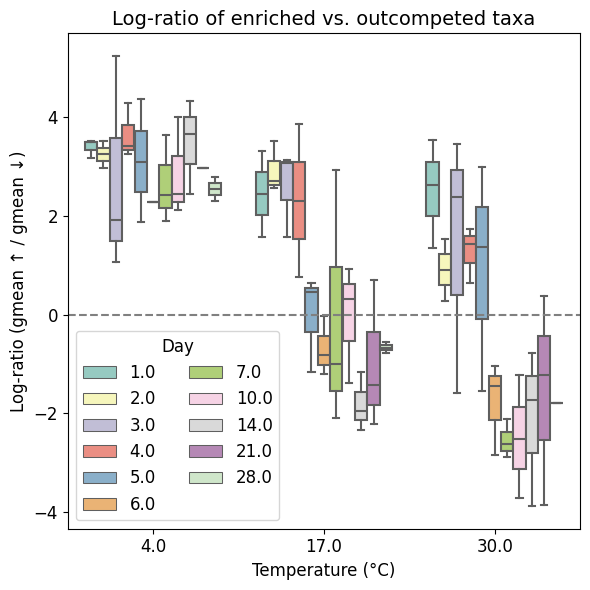

In [22]:
log_ratio_df = otu_df[["log_ratio"]].join(meta_df)
palette = sns.color_palette("Set3", 11) 

plt.figure(figsize=(6, 6))
sns.boxplot(data=log_ratio_df, x="temperature", y="log_ratio", hue="day", palette=palette)
plt.axhline(0, linestyle="--", color="grey")
plt.title("Log-ratio of enriched vs. outcompeted taxa", fontsize=14)
plt.ylabel("Log-ratio (gmean ↑ / gmean ↓)", fontsize=12)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Day", fontsize=12, title_fontsize=12, loc='lower left', ncol = 2)
plt.tight_layout()
# Save the plot
#plt.savefig(f'Figures/20250516_ancombc2_log_ratio_all_temps_16S.pdf', bbox_inches='tight')
plt.show()


### plot absolute abundances of species over time (since qPCR is available)

In [7]:
metadata.columns.to_list()

['Unnamed: 0',
 'Chao1 kmers ITS',
 'Chao1 OTUs ITS',
 'Chao1 ASVs ITS',
 'Chao1 kmers',
 'Chao1 OTUs',
 'Chao1 ASVs',
 'identifier',
 'row',
 'column',
 'temperature',
 'day',
 'replicate',
 'well',
 'DNA yield',
 'DNA_total_yield_per_1g',
 'pH',
 'TTA',
 'estimate_bact',
 'estimate_bact_CFUs',
 'LAB CFUs',
 'LAB_counts',
 'bac_diff',
 'yeast CFUs',
 'mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
 'Observed features ASVs',
 'Observed features OTUs',
 'Observed features kmers',
 'Shannon ASVs',
 'Evenness ASVs',
 'Simpson ASVs',
 'Shannon OTUs',
 'Evenness OTUs',
 'Simpson OTUs',
 'Shannon kmers',
 'Evenness kmers',
 'Simpson kmers',
 'color',
 'color2',
 'Observed features ASVs ITS',
 'Observed features OTUs ITS',
 'Observed features kmers ITS',
 'Shannon ASVs ITS',
 'Evenness ASVs ITS',
 'Simpson ASVs ITS',
 'Shannon OTUs ITS',
 'Evenness OTUs ITS',
 'Simpson OTUs ITS',
 'Shannon kmers ITS',
 'Evenness kmers 

In [8]:
otu_df

,Acetobacter cerevisiae,Lactobacillus sanfranciscensis,Pediococcus parvulus,Lactobacillus rossiae,Lactobacillus brevis
366294_118-LP4-16S-0618,0.028947,0.836842,0.010526,0.097368,0.026316
366294_124-LP4-16S-0624,0.436842,0.423684,0.000000,0.094737,0.044737
366294_128-LP4-16S-0628,0.645503,0.116402,0.026455,0.100529,0.111111
366294_130-LP4-16S-0630,0.347368,0.513158,0.013158,0.076316,0.050000
366294_132-LP4-16S-0632,0.021053,0.789474,0.013158,0.147368,0.028947
...,...,...,...,...,...
366294_263-LP4-16S-0763,0.023684,0.613158,0.002632,0.315789,0.044737
366294_264-LP4-16S-0764,0.010526,0.892105,0.005263,0.081579,0.010526
366294_265-LP4-16S-0765,0.021164,0.539683,0.044974,0.328042,0.066138
366294_266-LP4-16S-0766,0.013158,0.452632,0.065789,0.386842,0.081579


In [9]:
#make new columns in 'metadata' by merging otu_df and multiplying the columns 'Acetobacter cerevisiae', 
#'Lactobacillus sanfranciscensis', 'Pediococcus parvulus', 'Lactobacillus rossiae', and 'Lactobacillus brevis'
#with the column 'estimate_bact' from metadata (column multiplicatoins)

shared_index = otu_df.index.intersection(metadata.index)
otu_df_filt = otu_df.loc[shared_index]
metadata_filt = metadata.loc[shared_index].copy()  # make a copy to safely add new columns


# List of taxa to multiply
taxa_list = [
    'Acetobacter cerevisiae',
    'Lactobacillus sanfranciscensis',
    'Pediococcus parvulus',
    'Lactobacillus rossiae',
    'Lactobacillus brevis'
]

# Multiply each taxon by 'estimate_bact' and store result in metadata
for taxon in taxa_list:
    metadata_filt[f"{taxon}"] = otu_df_filt[taxon] * metadata_filt['estimate_bact']



metadata_filt 



,Unnamed: 0,Chao1 kmers ITS,Chao1 OTUs ITS,Chao1 ASVs ITS,Chao1 kmers,Chao1 OTUs,Chao1 ASVs,identifier,row,column,...,Evenness OTUs ITS,Simpson OTUs ITS,Shannon kmers ITS,Evenness kmers ITS,Simpson kmers ITS,Acetobacter cerevisiae,Lactobacillus sanfranciscensis,Pediococcus parvulus,Lactobacillus rossiae,Lactobacillus brevis
366294_118-LP4-16S-0618,366292_118-LP4-ITS-0618,2260.0,12.500000,20.000000,718.0,5.0,6.0,W04.02.28,B,6,...,0.041167,0.027771,8.289832,0.744009,0.996619,2.776053e+10,8.025316e+11,1.009474e+10,9.337632e+10,2.523684e+10
366294_124-LP4-16S-0624,366292_124-LP4-ITS-0624,1793.0,10.000000,13.000000,653.0,4.0,4.0,W17.01.28,H,6,...,0.050885,0.033944,8.311907,0.769040,0.996643,2.891895e+11,2.804789e+11,0.000000e+00,6.271579e+10,2.961579e+10
366294_128-LP4-16S-0628,366292_128-LP4-ITS-0628,2092.0,14.200000,15.250000,708.0,5.0,5.0,W30.03.28,D,7,...,0.033383,0.022726,8.298968,0.752354,0.996626,1.581481e+11,2.851852e+10,6.481481e+09,2.462963e+10,2.722222e+10
366294_130-LP4-16S-0630,366292_130-LP4-ITS-0630,1352.0,14.333333,10.000000,708.0,5.0,5.0,W17.02.28,F,7,...,0.044963,0.032242,8.269657,0.795092,0.996610,6.669474e+10,9.852632e+10,2.526316e+09,1.465263e+10,9.600000e+09
366294_132-LP4-16S-0632,366292_132-LP4-ITS-0632,2241.0,21.000000,17.333333,728.0,5.0,7.0,W04.01.28,H,7,...,0.099195,0.091696,8.425943,0.757053,0.996741,2.505263e+10,9.394737e+11,1.565789e+10,1.753684e+11,3.444737e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_263-LP4-16S-0763,366292_263-LP4-ITS-0763,2807.0,19.000000,21.500000,708.0,5.0,5.0,W17.03.07,C,12,...,0.066554,0.055226,8.392649,0.732674,0.996700,1.117895e+10,2.894105e+11,1.242105e+09,1.490526e+11,2.111579e+10
366294_264-LP4-16S-0764,366292_264-LP4-ITS-0764,3434.0,30.200000,25.375000,708.0,5.0,5.0,W04.03.04,D,12,...,0.103808,0.102250,8.521965,0.725541,0.996818,9.031579e+09,7.654263e+11,4.515789e+09,6.999474e+10,9.031579e+09
366294_265-LP4-16S-0765,366292_265-LP4-ITS-0765,2947.0,24.000000,23.000000,708.0,5.0,5.0,W30.03.05,E,12,...,0.091173,0.086082,8.421898,0.730748,0.996730,1.456085e+10,3.713016e+11,3.094180e+10,2.256931e+11,4.550265e+10
366294_266-LP4-16S-0766,366292_266-LP4-ITS-0766,2999.0,30.000000,23.600000,708.0,5.0,5.0,W30.01.03,F,12,...,0.094207,0.091507,8.484398,0.734563,0.996778,1.592105e+10,5.476842e+11,7.960526e+10,4.680789e+11,9.871053e+10


In [10]:
#then, take the log10 of the new columns in metadata_filt and also of 'estimate_bact':
import numpy as np

# List of adjusted columns
adjusted_cols = [f"{taxon}" for taxon in [
    'Acetobacter cerevisiae',
    'Lactobacillus sanfranciscensis',
    'Pediococcus parvulus',
    'Lactobacillus rossiae',
    'Lactobacillus brevis'
]]

# Log-transform the adjusted columns (add small constant to avoid log10(0))
for col in adjusted_cols:
    metadata_filt[f"log10_{col}"] = np.log10(metadata_filt[col] + 100)

# Log-transform estimate_bact
metadata_filt["log10_estimate_bact"] = np.log10(metadata_filt["estimate_bact"] + 100)

metadata_filt


,Unnamed: 0,Chao1 kmers ITS,Chao1 OTUs ITS,Chao1 ASVs ITS,Chao1 kmers,Chao1 OTUs,Chao1 ASVs,identifier,row,column,...,Lactobacillus sanfranciscensis,Pediococcus parvulus,Lactobacillus rossiae,Lactobacillus brevis,log10_Acetobacter cerevisiae,log10_Lactobacillus sanfranciscensis,log10_Pediococcus parvulus,log10_Lactobacillus rossiae,log10_Lactobacillus brevis,log10_estimate_bact
366294_118-LP4-16S-0618,366292_118-LP4-ITS-0618,2260.0,12.500000,20.000000,718.0,5.0,6.0,W04.02.28,B,6,...,8.025316e+11,1.009474e+10,9.337632e+10,2.523684e+10,10.443428,11.904462,10.004095,10.970237,10.402035,11.981819
366294_124-LP4-16S-0624,366292_124-LP4-ITS-0624,1793.0,10.000000,13.000000,653.0,4.0,4.0,W17.01.28,H,6,...,2.804789e+11,0.000000e+00,6.271579e+10,2.961579e+10,11.461182,11.447900,2.000000,10.797377,10.471523,11.820858
366294_128-LP4-16S-0628,366292_128-LP4-ITS-0628,2092.0,14.200000,15.250000,708.0,5.0,5.0,W30.03.28,D,7,...,2.851852e+10,6.481481e+09,2.462963e+10,2.722222e+10,11.199064,10.455127,9.811674,10.391458,10.434924,11.389166
366294_130-LP4-16S-0630,366292_130-LP4-ITS-0630,1352.0,14.333333,10.000000,708.0,5.0,5.0,W17.02.28,F,7,...,9.852632e+10,2.526316e+09,1.465263e+10,9.600000e+09,10.824092,10.993552,9.402488,10.165916,9.982271,11.283301
366294_132-LP4-16S-0632,366292_132-LP4-ITS-0632,2241.0,21.000000,17.333333,728.0,5.0,7.0,W04.01.28,H,7,...,9.394737e+11,1.565789e+10,1.753684e+11,3.444737e+10,10.398853,11.972885,10.194733,11.243951,10.537156,12.075547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_263-LP4-16S-0763,366292_263-LP4-ITS-0763,2807.0,19.000000,21.500000,708.0,5.0,5.0,W17.03.07,C,12,...,2.894105e+11,1.242105e+09,1.490526e+11,2.111579e+10,10.048401,11.461514,9.094158,11.173340,10.324607,11.673942
366294_264-LP4-16S-0764,366292_264-LP4-ITS-0764,3434.0,30.200000,25.375000,708.0,5.0,5.0,W04.03.04,D,12,...,7.654263e+11,4.515789e+09,6.999474e+10,9.031579e+09,9.955764,11.883903,9.654734,10.845065,9.955764,11.933487
366294_265-LP4-16S-0765,366292_265-LP4-ITS-0765,2947.0,24.000000,23.000000,708.0,5.0,5.0,W30.03.05,E,12,...,3.713016e+11,3.094180e+10,2.256931e+11,4.550265e+10,10.163187,11.569727,10.490546,11.353518,10.658037,11.837588
366294_266-LP4-16S-0766,366292_266-LP4-ITS-0766,2999.0,30.000000,23.600000,708.0,5.0,5.0,W30.01.03,F,12,...,5.476842e+11,7.960526e+10,4.680789e+11,9.871053e+10,10.201972,11.738530,10.900942,11.670319,10.994363,12.082785


In [11]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

In [12]:
#save metadata_filt as csv:
metadata_filt.to_csv('20250521_shipping_metadata_with_absolute_16S_species_data.csv', sep=',')

In [189]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_alpha_diversity(data, value_col, title, ylabel, return_stats=False, max_day=None):
    data = data.copy()

    # Clean values
    data[value_col] = pd.to_numeric(data[value_col], errors='coerce')

    # Filter by max_day if specified
    if max_day is not None:
        data = data[data['day'] <= max_day]

    # Step 1: Mean & SD per temperature x day
    means = data.groupby(['day', 'temperature'])[value_col].mean().reset_index()
    stds = data.groupby(['day', 'temperature'])[value_col].std().reset_index()
    means = means.rename(columns={value_col: 'mean_value'})
    stds = stds.rename(columns={value_col: 'std_value'})
    summary_df = pd.merge(means, stds, on=['day', 'temperature'])
    summary_df['error'] = summary_df['std_value']

    # Temperature label mapping
    temperature_labels = {4: "4°C", 17: "17°C", 30: "30°C", 20: "Control"}
    summary_df['temperature_label'] = summary_df['temperature'].map(temperature_labels)
    # Rebuild custom_palette using labeled keys
    custom_palette = (
        md.drop_duplicates('temperature')
        .assign(temp_label=lambda df: df['temperature'].map(temperature_labels))
        .set_index('temp_label')['color2']
        .to_dict()
    )

    # Plotting
    plt.figure(figsize=(8, 4))
    ax = sns.lineplot(
        data=summary_df,
        x='day', y='mean_value', hue='temperature_label',
        palette=custom_palette, marker="o", ci=None
    )

    # Error bars
    for _, row in summary_df.iterrows():
        plt.errorbar(
            row['day'], row['mean_value'],
            yerr=row['error'], fmt='none',
            color=custom_palette[row['temperature_label']],
            alpha=0.7, capsize=5, elinewidth=1
        )

    # ANOVA tests
    stats_list = []
    data_filtered = data[data['temperature'].isin([4, 17, 30])]  # Exclude control
    grouped = data_filtered.groupby('day')
    y_range = data_filtered[value_col].max() - data_filtered[value_col].min()

    for day, group in grouped:
        row = {'day': day, 'n_temperatures': group['temperature'].nunique()}
        if row['n_temperatures'] >= 2:
            groups = [
                group[group['temperature'] == t][value_col].dropna()
                for t in [4, 17, 30] if t in group['temperature'].values
            ]
            if all(len(g) > 1 for g in groups):  # Avoid errors from singleton groups
                stat, p = f_oneway(*groups)
                # Rough eta-squared effect size: SSB / SST
                group_means = [g.mean() for g in groups]
                group_sizes = [len(g) for g in groups]
                overall_mean = group[value_col].mean()

                ss_between = sum(n * (mean - overall_mean)**2 for n, mean in zip(group_sizes, group_means))
                ss_total = sum((x - overall_mean)**2 for g in groups for x in g)
                eta_squared = ss_between / ss_total if ss_total > 0 else None
                row['effect_size_eta2'] = eta_squared

                row['anova_stat'] = stat
                row['p_value'] = p
                if p < 0.05:
                    max_y = group[value_col].max()
                    if p < 0.001:
                        stars = '***'
                    elif p < 0.01:
                        stars = '**'
                    else:
                        stars = '*'
                    ax.text(day, max_y + 0.05 * y_range, stars, ha='center', va='bottom', fontsize=14)
            else:
                row['anova_stat'] = None
                row['p_value'] = None
        else:
            row['anova_stat'] = None
            row['p_value'] = None
        stats_list.append(row)

    stats_df = pd.DataFrame(stats_list)

    # Final plot styling
    plt.title(title, fontsize=14)
    plt.xlabel('Days', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    # desired_days = [1, 2, 3, 4, 5, 6, 7, 10, 14, 21, 28]
    desired_days = sorted(data['day'].unique())

    plt.xticks(ticks=desired_days, labels=desired_days, fontsize=12)
    plt.yticks(fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.grid(False)
    legend = plt.legend(title='Temperature', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fontsize=12)
    legend.set_title('')
    fig = plt.gcf()
    plt.tight_layout()
    plt.show()

    if return_stats:
        return fig, stats_df

In [194]:
md = metadata_filt.copy()

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_78556/3818481289.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

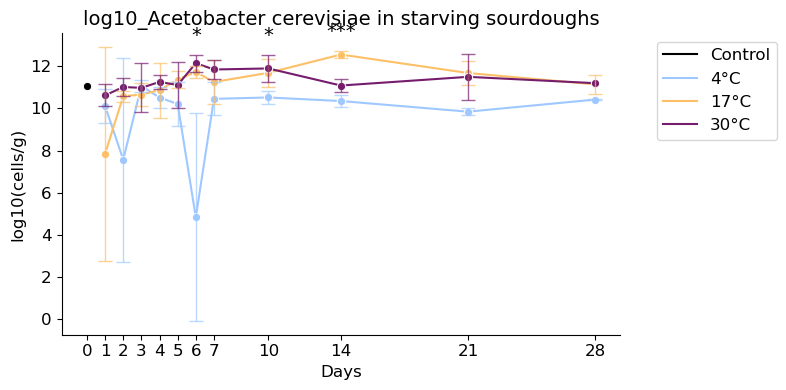

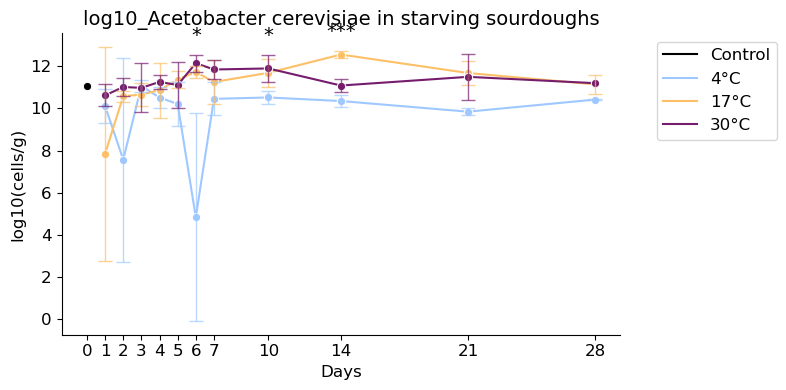

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_78556/3818481289.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

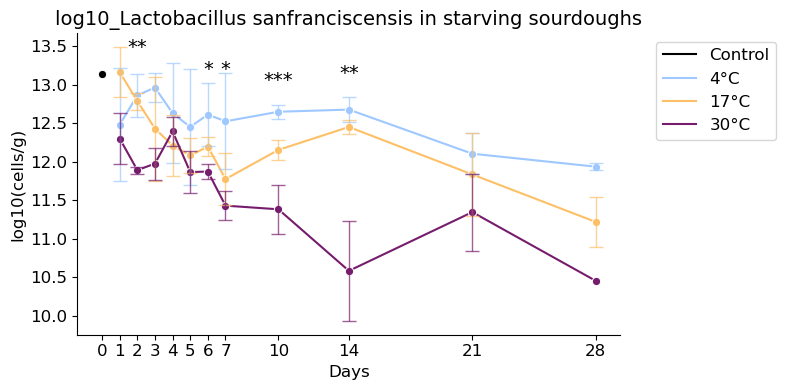

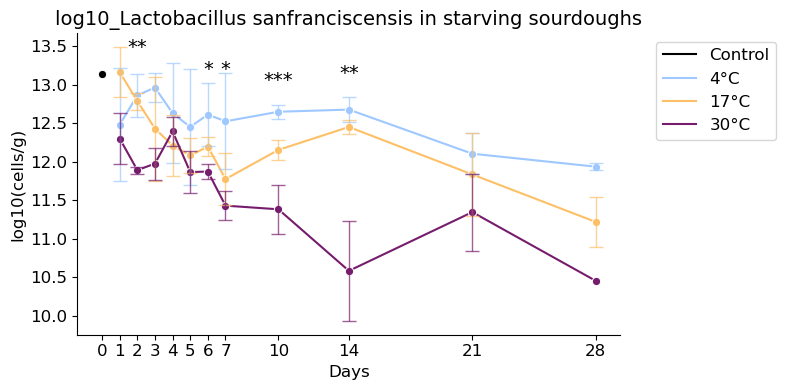

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_78556/3818481289.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

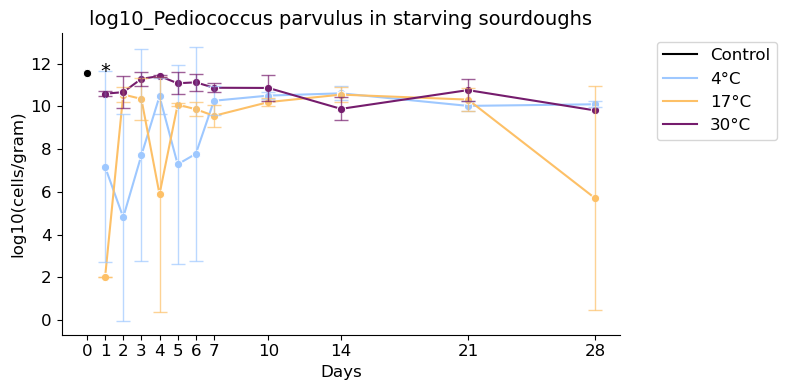

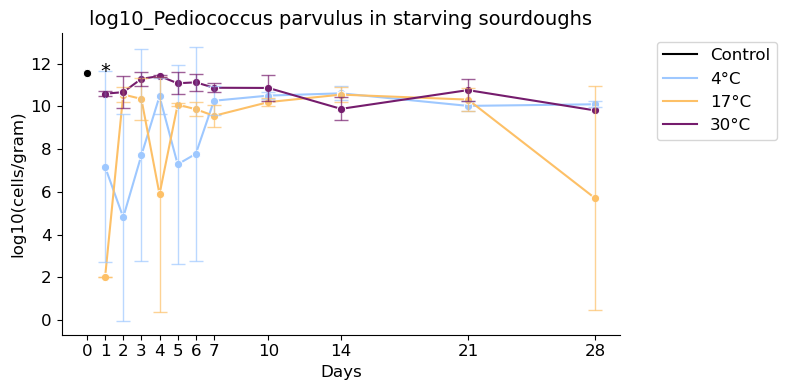

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_78556/3818481289.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

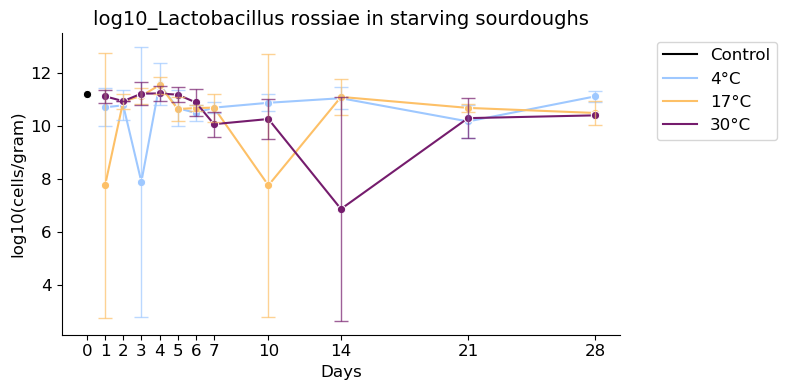

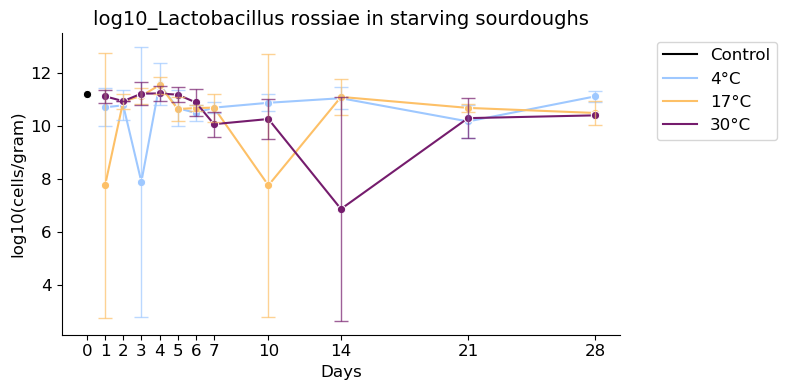

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_78556/3818481289.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

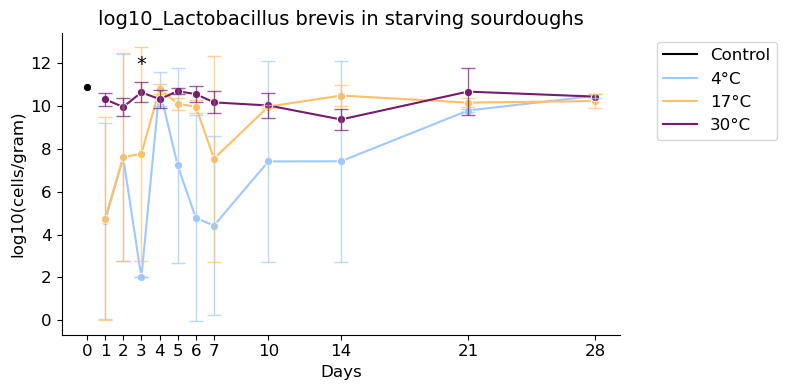

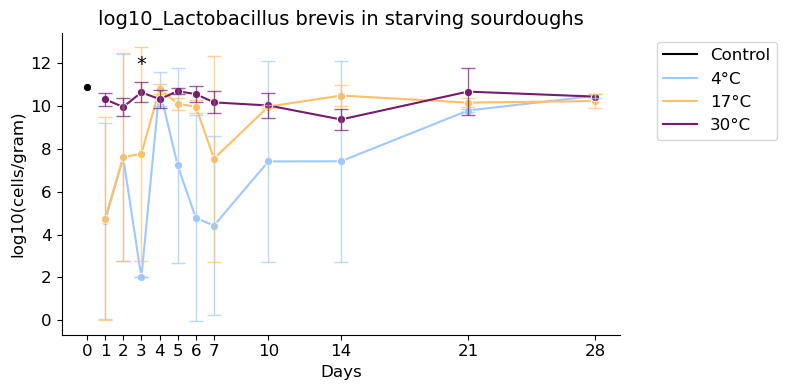

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_78556/3818481289.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

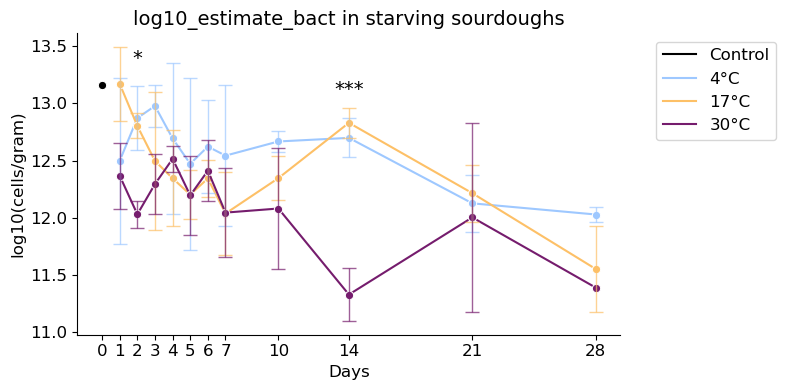

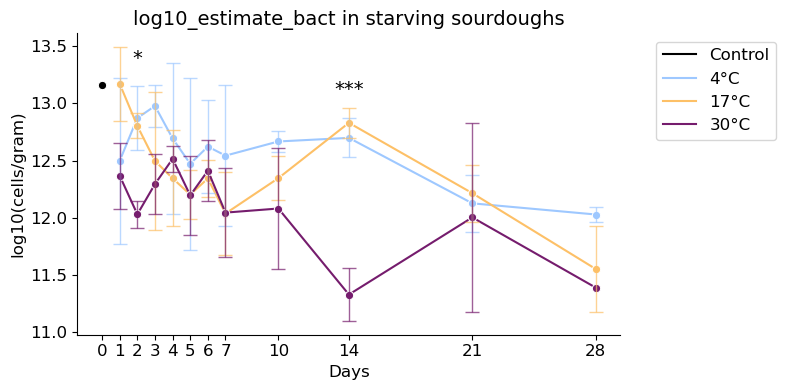

All ANOVA stats exported to: Stats/20250517_anova_results_all_metrics_16S_species.xlsx


In [195]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import xlsxwriter

# Output paths
fig_dir = "Figures/per_variable_stats_anova/"
os.makedirs(fig_dir, exist_ok=True)
excel_path = "Stats/20250517_anova_results_all_metrics_16S_species.xlsx"

# Variables to loop over
metrics = {
    'log10_Acetobacter cerevisiae': ('log10(cells/g)', 28),
    'log10_Lactobacillus sanfranciscensis': ('log10(cells/g)', 28),
    'log10_Pediococcus parvulus': ('log10(cells/gram)', 28),
    'log10_Lactobacillus rossiae': ('log10(cells/gram)', 28),
    'log10_Lactobacillus brevis': ('log10(cells/gram)', 28),
    'log10_estimate_bact': ('log10(cells/gram)', 28)
}


# Excel writer
excel_writer = pd.ExcelWriter(excel_path, engine='xlsxwriter')

for var, (ylab, max_day) in metrics.items():
    title = f"{var} in starving sourdoughs"
    filename = os.path.join(fig_dir, f"20250517_ANOVA_{var.replace(' ', '_')}.pdf")

    fig, result_df = plot_alpha_diversity(
        data=md,
        value_col=var,
        title=title,
        ylabel=ylab,
        return_stats=True,
        max_day=max_day
    )

    fig.savefig(filename, format='pdf', bbox_inches='tight')
    display(fig)
    plt.close(fig)

    result_df.to_excel(excel_writer, sheet_name=var[:31], index=False)


# Save workbook
excel_writer.close()
print(f"All ANOVA stats exported to: {excel_path}")

In [215]:
def plot_absolute_abundance_over_time(df, species_cols, temperature_value, title, ylabel,
                                      custom_colors=None, renaming_dict=None):
    df = df.copy()

    # Filter by temperature
    df_temp = df[df['temperature'] == temperature_value]

    # Melt to long format
    df_melted = df_temp.melt(
        id_vars=['day'], 
        value_vars=species_cols, 
        var_name='Species', 
        value_name='log10_abundance'
    )

    # Strip 'log10_' prefix for matching and readability
    df_melted['Species'] = df_melted['Species'].str.replace('log10_', '', regex=False)

    # Apply renaming if provided
    if renaming_dict:
        df_melted['Species'] = df_melted['Species'].map(renaming_dict)

    # Group for mean and std
    summary_df = (
        df_melted
        .groupby(['day', 'Species'])
        .agg(mean_value=('log10_abundance', 'mean'), std_value=('log10_abundance', 'std'))
        .reset_index()
    )
    summary_df['error'] = summary_df['std_value']

    # Prepare custom palette
    palette = None
    if custom_colors:
        # Apply same renaming to custom_colors
        if renaming_dict:
            palette = {renaming_dict[k]: v for k, v in custom_colors.items()}
        else:
            palette = custom_colors

    # Plotting
    plt.figure(figsize=(8, 4.5))
    ax = sns.lineplot(
        data=summary_df,
        x='day', y='mean_value', hue='Species',
        palette=palette, marker="o", ci=None
    )

    # # Error bars
    # for _, row in summary_df.iterrows():
    #     color = palette[row['Species']] if palette else None
    #     plt.errorbar(
    #         row['day'], row['mean_value'],
    #         yerr=row['error'], fmt='none',
    #         color=color,
    #         alpha=0.6, capsize=4, elinewidth=1
    #     )

    # Styling
    plt.title(title, fontsize=14)
    plt.xlabel('Days', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(sorted(df_temp['day'].unique()), fontsize=12)
    plt.yticks(fontsize=12)
#set y axis limits:
    plt.ylim(0, 14)
    plt.grid(False)
    plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fontsize=12)
    plt.tight_layout()
    # Save the plot
    plt.savefig(f'Figures/20250517_absolute_abundance_{temperature_value}C_16S.pdf', bbox_inches='tight')
    plt.show()



In [211]:
md.columns.to_list()

['Unnamed: 0',
 'Chao1 kmers ITS',
 'Chao1 OTUs ITS',
 'Chao1 ASVs ITS',
 'Chao1 kmers',
 'Chao1 OTUs',
 'Chao1 ASVs',
 'identifier',
 'row',
 'column',
 'temperature',
 'day',
 'replicate',
 'well',
 'DNA yield',
 'DNA_total_yield_per_1g',
 'pH',
 'TTA',
 'estimate_bact',
 'estimate_bact_CFUs',
 'LAB CFUs',
 'LAB_counts',
 'bac_diff',
 'yeast CFUs',
 'mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
 'Observed features ASVs',
 'Observed features OTUs',
 'Observed features kmers',
 'Shannon ASVs',
 'Evenness ASVs',
 'Simpson ASVs',
 'Shannon OTUs',
 'Evenness OTUs',
 'Simpson OTUs',
 'Shannon kmers',
 'Evenness kmers',
 'Simpson kmers',
 'color',
 'color2',
 'Observed features ASVs ITS',
 'Observed features OTUs ITS',
 'Observed features kmers ITS',
 'Shannon ASVs ITS',
 'Evenness ASVs ITS',
 'Simpson ASVs ITS',
 'Shannon OTUs ITS',
 'Evenness OTUs ITS',
 'Simpson OTUs ITS',
 'Shannon kmers ITS',
 'Evenness kmers 

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_78556/3684465894.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

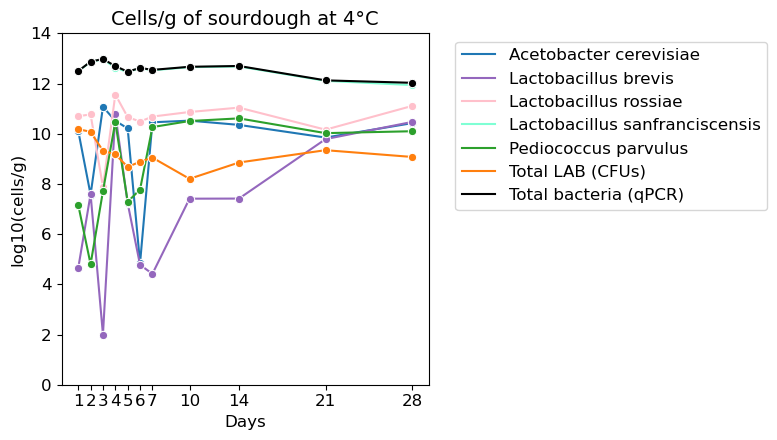

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_78556/3684465894.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

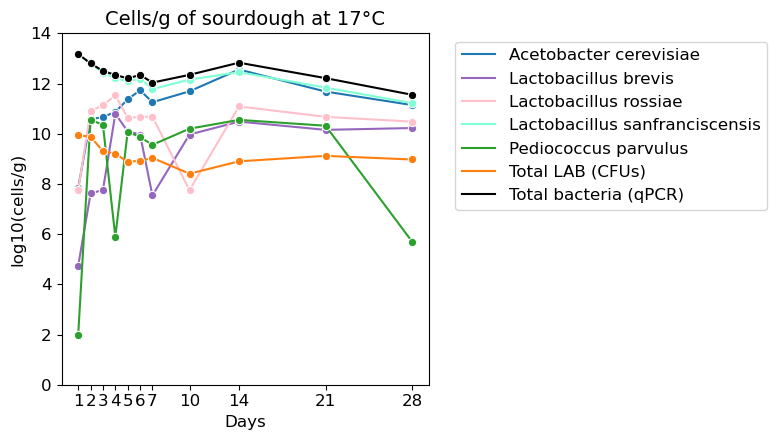

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_78556/3684465894.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

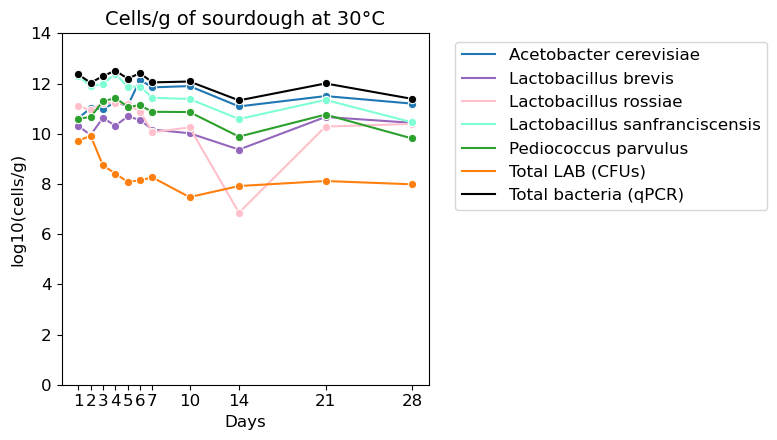

In [216]:
species_cols = [
    'log10_Acetobacter cerevisiae',
    'log10_Lactobacillus sanfranciscensis',
    'log10_Pediococcus parvulus',
    'log10_Lactobacillus rossiae',
    'log10_Lactobacillus brevis',
    'log10_estimate_bact',
    'LAB CFUs'
]

custom_colors = {
    'Acetobacter cerevisiae': '#1f77b4',
    'Lactobacillus sanfranciscensis': '#7fffd4',
    'Pediococcus parvulus': '#2ca02c',
    'Lactobacillus rossiae': '#ffc0cb',
    'Lactobacillus brevis': '#9467bd',
    'estimate_bact': 'black',
    'LAB CFUs': '#FF7F0E'
   } 


renaming_dict = {
    'Acetobacter cerevisiae': 'Acetobacter cerevisiae',
    'Lactobacillus sanfranciscensis': 'Lactobacillus sanfranciscensis',
    'Pediococcus parvulus': 'Pediococcus parvulus',
    'Lactobacillus rossiae': 'Lactobacillus rossiae',
    'Lactobacillus brevis': 'Lactobacillus brevis',
    'estimate_bact': 'Total bacteria (qPCR)',
    'LAB CFUs': 'Total LAB (CFUs)',
    
    #'Other': 'Other'
}

for temp in [4, 17, 30]:
    plot_absolute_abundance_over_time(
        metadata_filt,
        species_cols=species_cols,
        temperature_value=temp,
        title=f"Cells/g of sourdough at {temp}°C",
        ylabel='log10(cells/g)',
        custom_colors=custom_colors,
        renaming_dict=renaming_dict
    )



### next, compare total bacterial load as determined by qPCR with LAB CFUs

Run Spearman's (non-parametric) or Pearson's correlation between:
log10(qPCR_abundance) and log10(CFU_count)
Do this:
Globally (all samples)
Per temperature, or
Per time point

In [218]:
metadata.columns.to_list()

['Unnamed: 0',
 'Chao1 kmers ITS',
 'Chao1 OTUs ITS',
 'Chao1 ASVs ITS',
 'Chao1 kmers',
 'Chao1 OTUs',
 'Chao1 ASVs',
 'identifier',
 'row',
 'column',
 'temperature',
 'day',
 'replicate',
 'well',
 'DNA yield',
 'DNA_total_yield_per_1g',
 'pH',
 'TTA',
 'estimate_bact',
 'estimate_bact_CFUs',
 'LAB CFUs',
 'LAB_counts',
 'bac_diff',
 'yeast CFUs',
 'mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
 'Observed features ASVs',
 'Observed features OTUs',
 'Observed features kmers',
 'Shannon ASVs',
 'Evenness ASVs',
 'Simpson ASVs',
 'Shannon OTUs',
 'Evenness OTUs',
 'Simpson OTUs',
 'Shannon kmers',
 'Evenness kmers',
 'Simpson kmers',
 'color',
 'color2',
 'Observed features ASVs ITS',
 'Observed features OTUs ITS',
 'Observed features kmers ITS',
 'Shannon ASVs ITS',
 'Evenness ASVs ITS',
 'Simpson ASVs ITS',
 'Shannon OTUs ITS',
 'Evenness OTUs ITS',
 'Simpson OTUs ITS',
 'Shannon kmers ITS',
 'Evenness kmers 

overall correlation per temperature between CFUs and qPCR:

In [219]:
from scipy.stats import spearmanr

# For all samples:
spearmanr(metadata['estimate_bact_CFUs'], metadata['LAB CFUs'])

# Per temperature:
for temp in [4, 17, 30]:
    subset = metadata[metadata['temperature'] == temp]
    print(f"{temp}°C:", spearmanr(subset['estimate_bact_CFUs'], subset['LAB CFUs']))


4°C: SignificanceResult(statistic=-0.03626639939126489, pvalue=0.8411933523252498)
17°C: SignificanceResult(statistic=0.3770053475935829, pvalue=0.030561141742883647)
30°C: SignificanceResult(statistic=0.43014705882352944, pvalue=0.012469424034093474)


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/meyeanni/miniconda3/en

NameError: name 'sm' is not defined

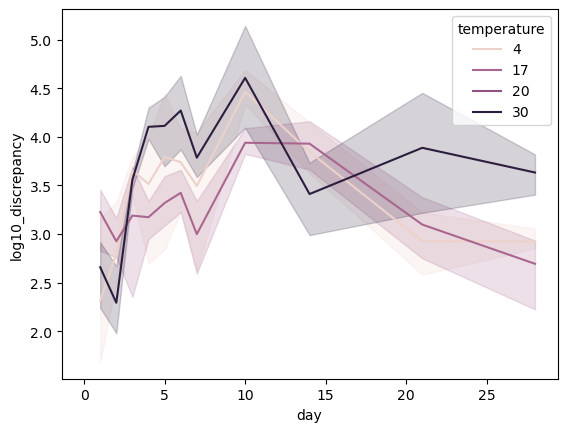

In [220]:
metadata['log10_discrepancy'] = metadata['estimate_bact_CFUs'] - metadata['LAB CFUs']

# Plot:
sns.lineplot(data=metadata, x='day', y='log10_discrepancy', hue='temperature')

# ANOVA (simple):
import statsmodels.formula.api as smf
model = smf.ols('log10_discrepancy ~ C(temperature) * day', data=metadata).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/meyeanni/miniconda3/en

<Axes: xlabel='day', ylabel='log10_culturability'>

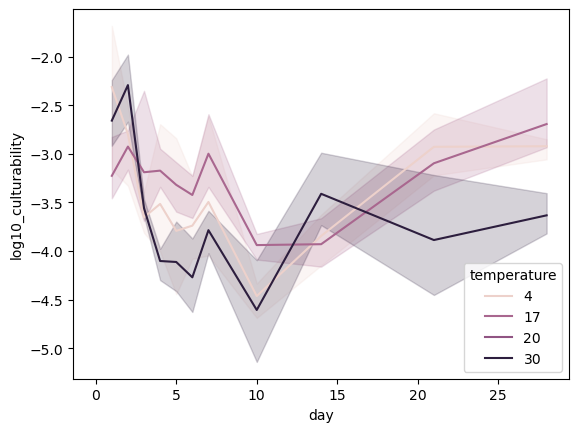

In [222]:
metadata['log10_culturability'] = metadata['LAB CFUs'] - metadata['estimate_bact_CFUs']
sns.lineplot(data=metadata, x='day', y='log10_culturability', hue='temperature')


linear-mixed-effect model:

In [225]:
#drop the 20 degree samples:
metadata_x = metadata[~metadata['temperature'].isin([20])]

In [227]:
import statsmodels.formula.api as smf

# Fit the mixed model: random intercept per replicate
model = smf.mixedlm(
    "log10_culturability ~ C(temperature) * day",
    data=metadata_x,
    groups=metadata_x["replicate"]  # or "batch" if that’s your grouping
)
result = model.fit()
print(result.summary())


               Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  log10_culturability
No. Observations:  99       Method:              REML               
No. Groups:        3        Scale:               0.4335             
Min. group size:   33       Log-Likelihood:      -109.9778          
Max. group size:   33       Converged:           Yes                
Mean group size:   33.0                                             
--------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                -3.449    0.174 -19.862 0.000 -3.790 -3.109
C(temperature)[T.17]      0.116    0.244   0.475 0.635 -0.362  0.594
C(temperature)[T.30]     -0.042    0.244  -0.170 0.865 -0.520  0.437
day                       0.005    0.014   0.334 0.738 -0.023  0.032
C(temperature)[T.17]:day  0.003    0.020   0.137 0

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


-->> nothing interesting

## plot 16S-FIA disparity over time

In [5]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

In [7]:
#import the disparsity excel, sheet= 'day_temp_disparsity':
disparity_df = pd.read_excel('FIA/stats/20250527_disparities_FIA_16S.xlsx', sheet_name='day_temp_disparity')
disparity_df

,day,temperature,disparity,pval
0,1,4,9.383413e-01,1.000000
1,2,4,5.204003e-01,0.677323
2,3,4,7.968635e-01,0.689311
3,4,4,8.980293e-02,0.000999
4,5,4,1.424835e-02,0.190809
5,6,4,5.337289e-01,0.340659
6,7,4,6.158018e-01,0.494505
7,10,4,1.169960e-01,0.168831
8,14,4,4.150187e-02,0.315684
9,21,4,3.697785e-31,0.000999


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/meyeanni/miniconda3/en

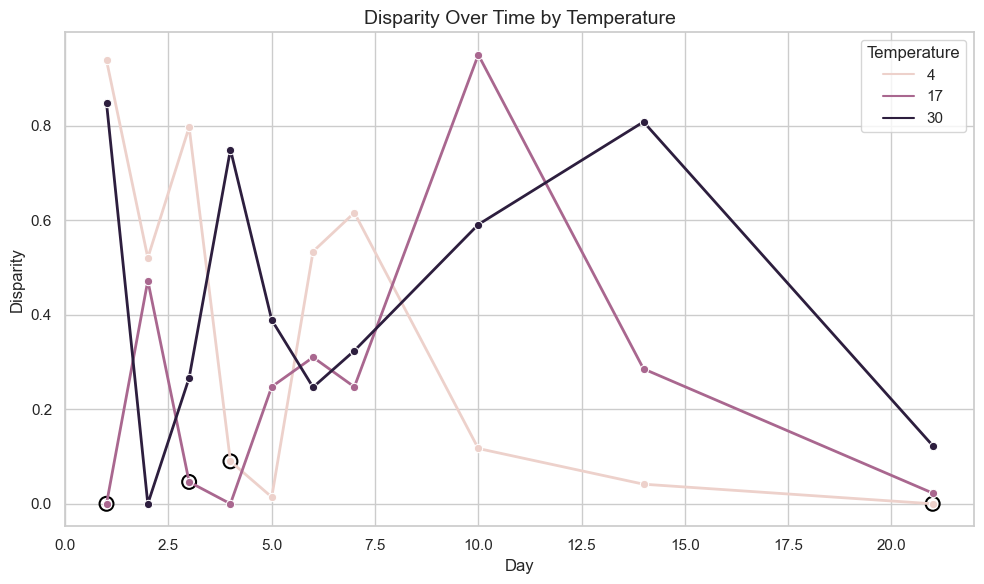

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = disparity_df.copy()

# Initialize the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot lines for each temperature group
sns.lineplot(data=df, x="day", y="disparity", hue="temperature", marker="o", linewidth=2)

# Overlay significant points with black edges
for _, row in df.iterrows():
    if row['pval'] < 0.05:
        plt.scatter(row['day'], row['disparity'], s=100, edgecolors='black',
                    facecolors='none', linewidth=1.5)

# Add labels and title
plt.xlabel("Day", fontsize=12)
plt.ylabel("Disparity", fontsize=12)
plt.title("Disparity Over Time by Temperature", fontsize=14)
plt.legend(title="Temperature")
plt.tight_layout()
plt.show()
